# Applied Machine learning : Homework 1 Question 2 

#### Name: Yukta Sanjay Muthreja

#### Student ID: 2001270781

Name of all the attributes:
ID
Price: price of the care(Target Column)
Levy
Manufacturer
Model
Prod. year
Category
Leather interior
Fuel type
Engine volume
Mileage
Cylinders
Gear box type
Drive wheels
Doors
Wheel
Color
Airbags

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
car =pd.read_csv("/Users/yuktamuthreja/Library/CloudStorage/OneDrive-IndianaUniversity/AML Notes/Assignment 1/car_price_prediction.csv")
car.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


### Question A. Summarize the data. How much data is present? What attributes/features are continuous valued? Which attributes are categorical?

#### The Length of the dataset:

In [3]:
car.shape

(19237, 18)

#### General description of the data values, along with it's count and data type

In [4]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

#### Analyzing the above outputs, the the attributes can be classified as follows:
- ID, Price, Levy, Production Year, Mileage, Airbags, Cylinder and Engine Volume are continuous variables.
- Manufacturer, Model, Category, Leather interior, Fuel Type, Gear box type, Drive wheels, Color and Doors are categorical variables

Note: Although the output of the data type and the classification may be different, the variables will be pre-proccessed to be classified accordingly.

### Question B: Display the statistical values for each of the attributes, along with visualizations (e.g., histogram) of the distributions for each attribute. Explain noticeable traits for key attributes. Are there any attributes that might require special treatment? If so, what special treatment might they require?

Analyzing the statistical values for each of the numerical attributes

In [5]:
car.describe()

,ID,Price,Prod. year,Cylinders,Airbags
count,1.923700e+04,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,2010.912824,4.582991,6.582627
std,9.365914e+05,1.905813e+05,5.668673,1.199933,4.320168
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


However, we have noticed that there are additional numerical columns that need some pre-processing. Further, we can analyze the frequencies of each attribute.

In [6]:
for i in ['ID', 'Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year',
       'Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags']:
    print(car[i].value_counts())

45815365    8
45815361    8
45815363    7
45815368    7
45723475    7
           ..
45774312    1
45732621    1
45773011    1
45774019    1
45813273    1
Name: ID, Length: 18924, dtype: int64
15681    280
470      274
14113    244
392      242
314      235
        ... 
42601      1
149        1
54349      1
54954      1
22075      1
Name: Price, Length: 2315, dtype: int64
-       5819
765      486
891      461
639      410
640      405
        ... 
3156       1
2908       1
1279       1
1719       1
1901       1
Name: Levy, Length: 559, dtype: int64
HYUNDAI          3769
TOYOTA           3662
MERCEDES-BENZ    2076
FORD             1111
CHEVROLET        1069
                 ... 
TESLA               1
PONTIAC             1
SATURN              1
ASTON MARTIN        1
GREATWALL           1
Name: Manufacturer, Length: 65, dtype: int64
Prius                    1083
Sonata                   1079
Camry                     938
Elantra                   922
E 350                     542
       

Observing the data from a high-level perspective, we notice the following:
- ID: is a primary key of the dataset (as each car sale has a unique ID) and we won't be adding this to the prediction model. Hence we can drop it.
- Price: this is the value that we would need to predict
- Levy: We can notice that there is data with "-" as the value, we would have to replace that to 0 and will that with the closest prediction.
- Manufacturer, Model and Category:  There are a few values which are occuring only once, we will fix the data when we are treating it for outliers.
- Engine volume and Mileage - We would have treat this attribute to read it as a numerical variable
- Color: From the value counts we can see that the data is not equally spread.
 


Before analyzing the data using histograms, we will clean the data such that we can better analyze the trends and the spread of the data.

In [7]:
Mileage_new = [float(value.split(' ')[0]) for value in car['Mileage']]
car['Mileage'] = Mileage_new # replacing mileage data from the original dataset with the cleaned data 

In [8]:
Enginevol_new = [float(value.split(' ')[0]) for value in car['Engine volume']]
car['Engine volume'] = Enginevol_new # replacing engine volume data from the original dataset with the cleaned data 

In [9]:
car["Levy"] = np.where(car["Levy"] == "-" ,0 , car["Levy"]).astype(int) #Replacing the "-" in Levy with 0 and saving it as int

In [10]:
car.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005.0,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,192000.0,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000.0,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966.0,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901.0,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [11]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  int64  
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  float64
 10  Mileage           19237 non-null  float64
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [12]:
car.describe() #Reviewing the statistical values for each of the cleaned numerical attributes

,ID,Price,Levy,Prod. year,Engine volume,Mileage,Cylinders,Airbags
count,1.923700e+04,1.923700e+04,19237.000000,19237.000000,19237.000000,1.923700e+04,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,632.528669,2010.912824,2.307990,1.532236e+06,4.582991,6.582627
std,9.365914e+05,1.905813e+05,567.721688,5.668673,0.877805,4.840387e+07,1.199933,4.320168
min,2.074688e+07,1.000000e+00,0.000000,1939.000000,0.000000,0.000000e+00,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,0.000000,2009.000000,1.800000,7.013900e+04,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,642.000000,2012.000000,2.000000,1.260000e+05,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,917.000000,2015.000000,2.500000,1.888880e+05,4.000000,12.000000
max,4.581665e+07,2.630750e+07,11714.000000,2020.000000,20.000000,2.147484e+09,16.000000,16.000000


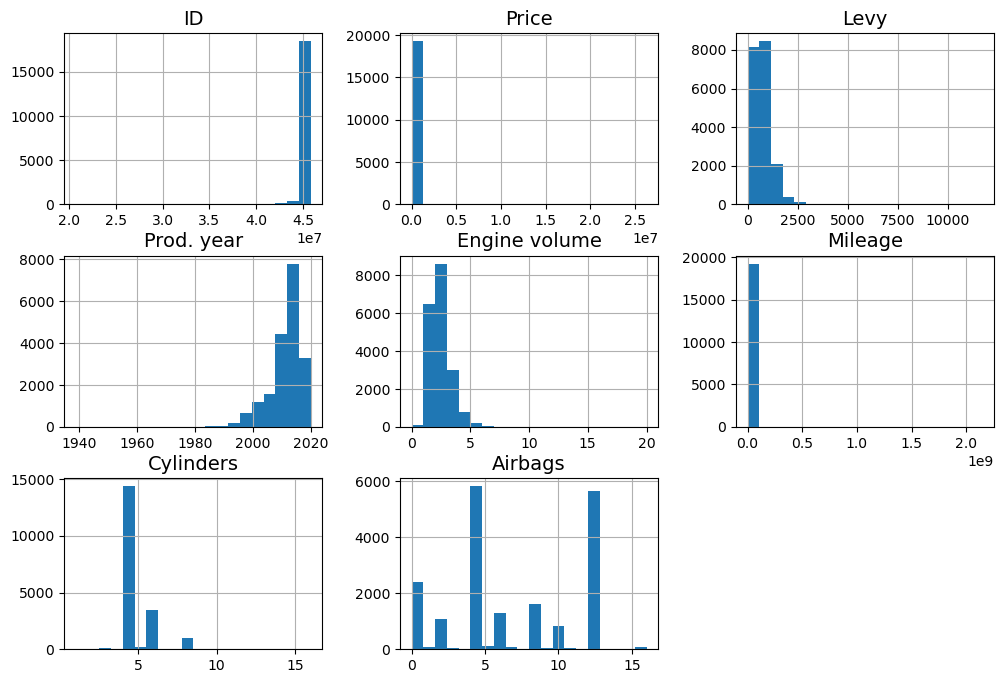

In [13]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

car.hist(bins=20, figsize=(12, 8))
plt.show()

#Ref: Code from chapter 2 of Hands-on Machine Learning with Scikit-Learn, Keras and TensorFlow (3rd edition).

In [14]:
car_numerical = car.select_dtypes(include=np.number)

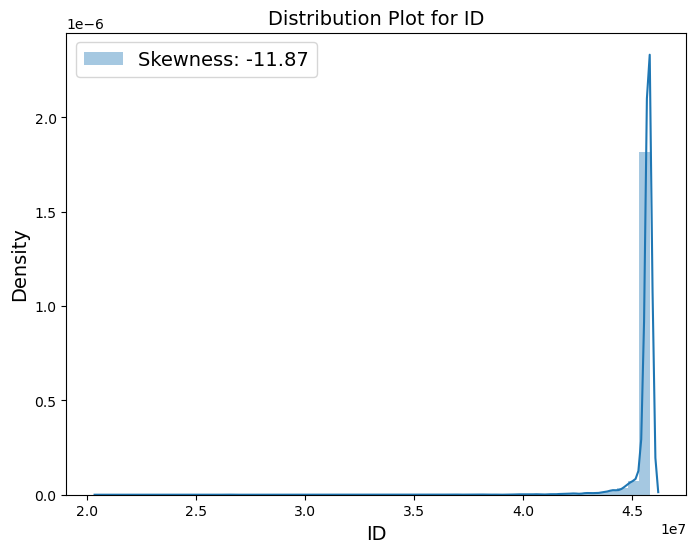

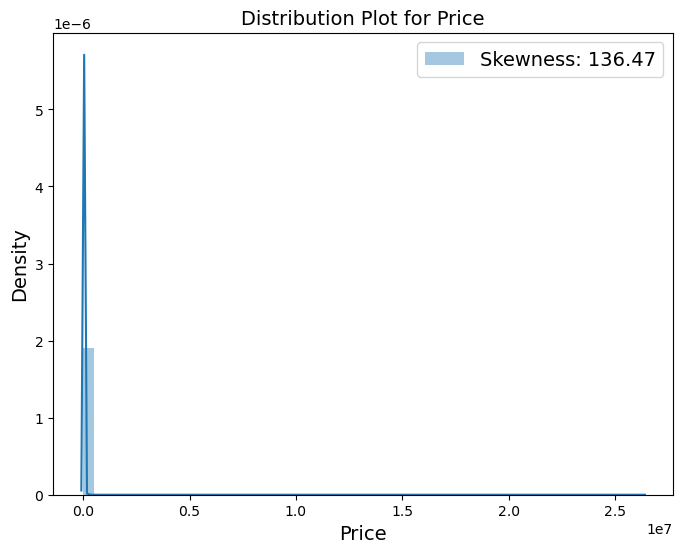

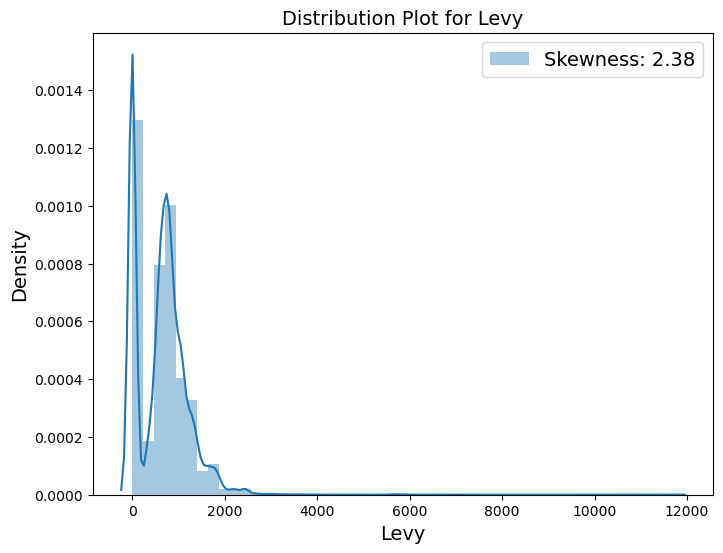

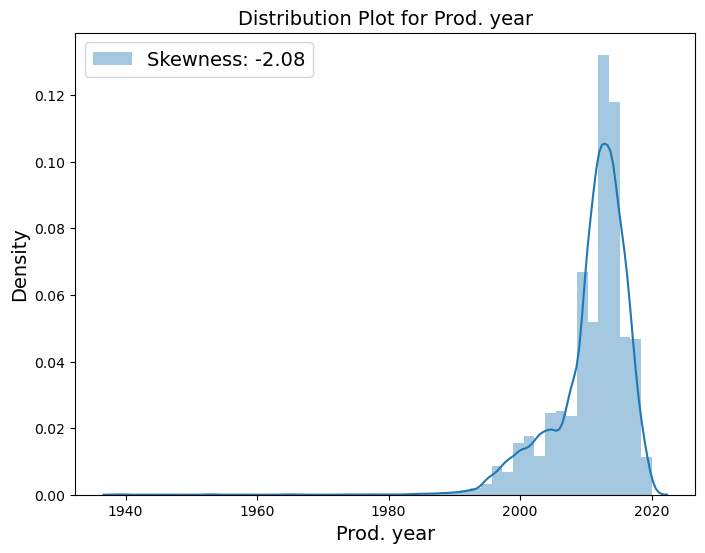

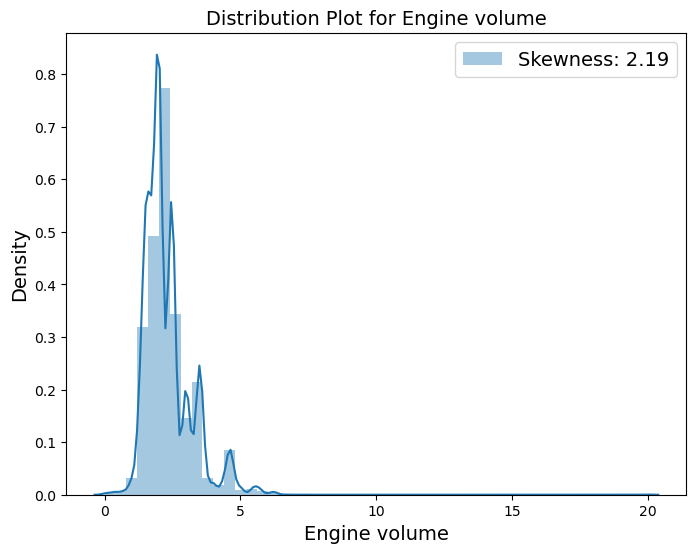

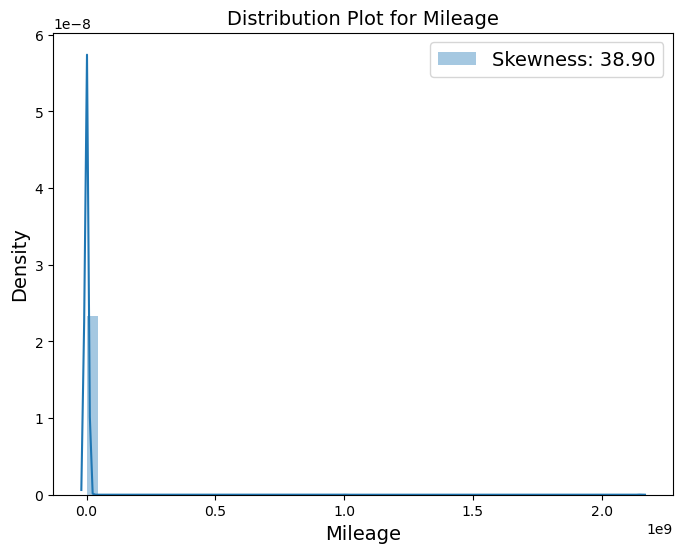

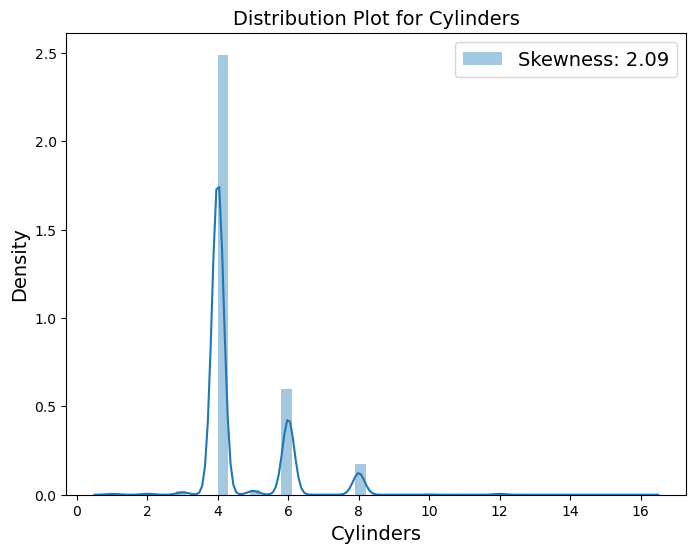

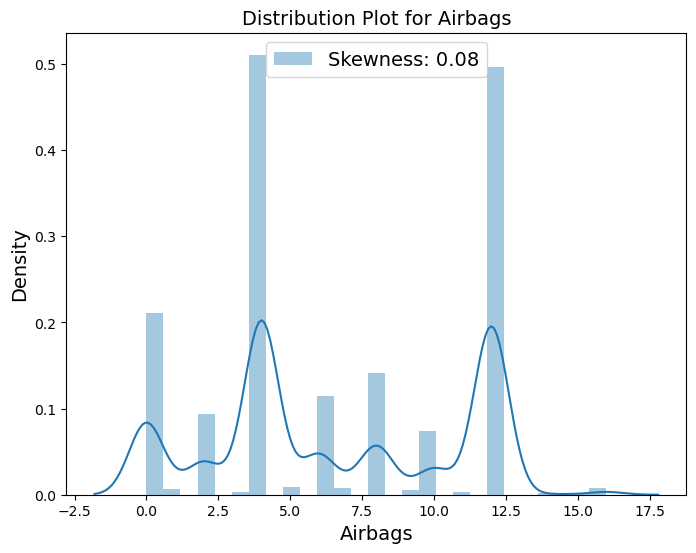

In [15]:
import warnings

warnings.filterwarnings("ignore")

for i in car_numerical.columns:
    plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
    sns.distplot(car[i], label='Skewness: %.2f' % (car[i].skew()))
    plt.legend()
    plt.title(f'Distribution Plot for {i}')
    plt.show()
    
warnings.resetwarnings()


From the above distributions, we notice the following:
- Price and Mileage are highly skewed, we will adjust for the skeweness during the data pre-processing stage.
- There are primarily only 3 different cylinders, that is, 4,6 and 8. Hence we will clean the data to make this more representative

### Question C: Analyze and discuss the relationships between the data attributes, and between the data attributes and label. This involves computing the Pearson Correlation Coefficient (PCC) and generating scatter plots. 

In [16]:
car_numerical.corr()

,ID,Price,Levy,Prod. year,Engine volume,Mileage,Cylinders,Airbags
ID,1.000000,-0.000844,0.102614,0.071352,-0.012232,0.004157,-0.039319,-0.020527
Price,-0.000844,1.000000,-0.003701,0.012982,0.008753,-0.001758,0.007518,-0.012824
Levy,0.102614,-0.003701,1.000000,0.364712,0.377438,-0.021034,0.250950,0.128032
Prod. year,0.071352,0.012982,0.364712,1.000000,-0.030906,-0.063501,-0.096797,0.236969
Engine volume,-0.012232,0.008753,0.377438,-0.030906,1.000000,-0.006289,0.778524,0.224441
Mileage,0.004157,-0.001758,-0.021034,-0.063501,-0.006289,1.000000,-0.001768,-0.009201
Cylinders,-0.039319,0.007518,0.250950,-0.096797,0.778524,-0.001768,1.000000,0.176868
Airbags,-0.020527,-0.012824,0.128032,0.236969,0.224441,-0.009201,0.176868,1.000000


<Axes: >

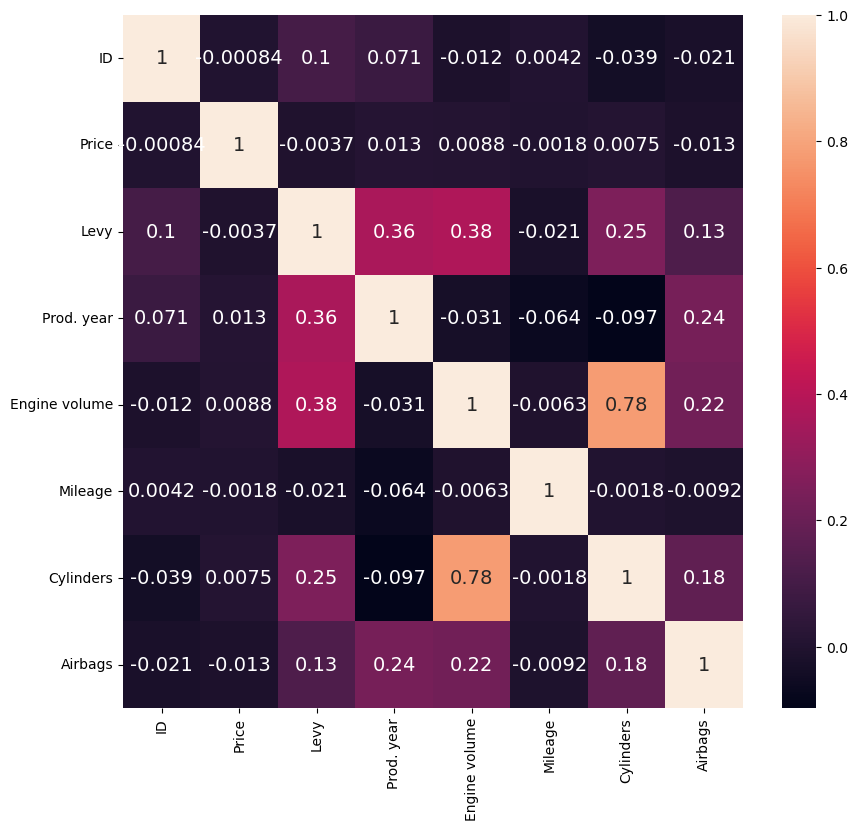

In [17]:
fig,ax=plt.subplots(figsize=(10,9))
sns.heatmap(car_numerical.corr(),annot=True)

In [18]:
car_label = car["Price"]
car_attributes = car.drop("Price", errors = "ignore")

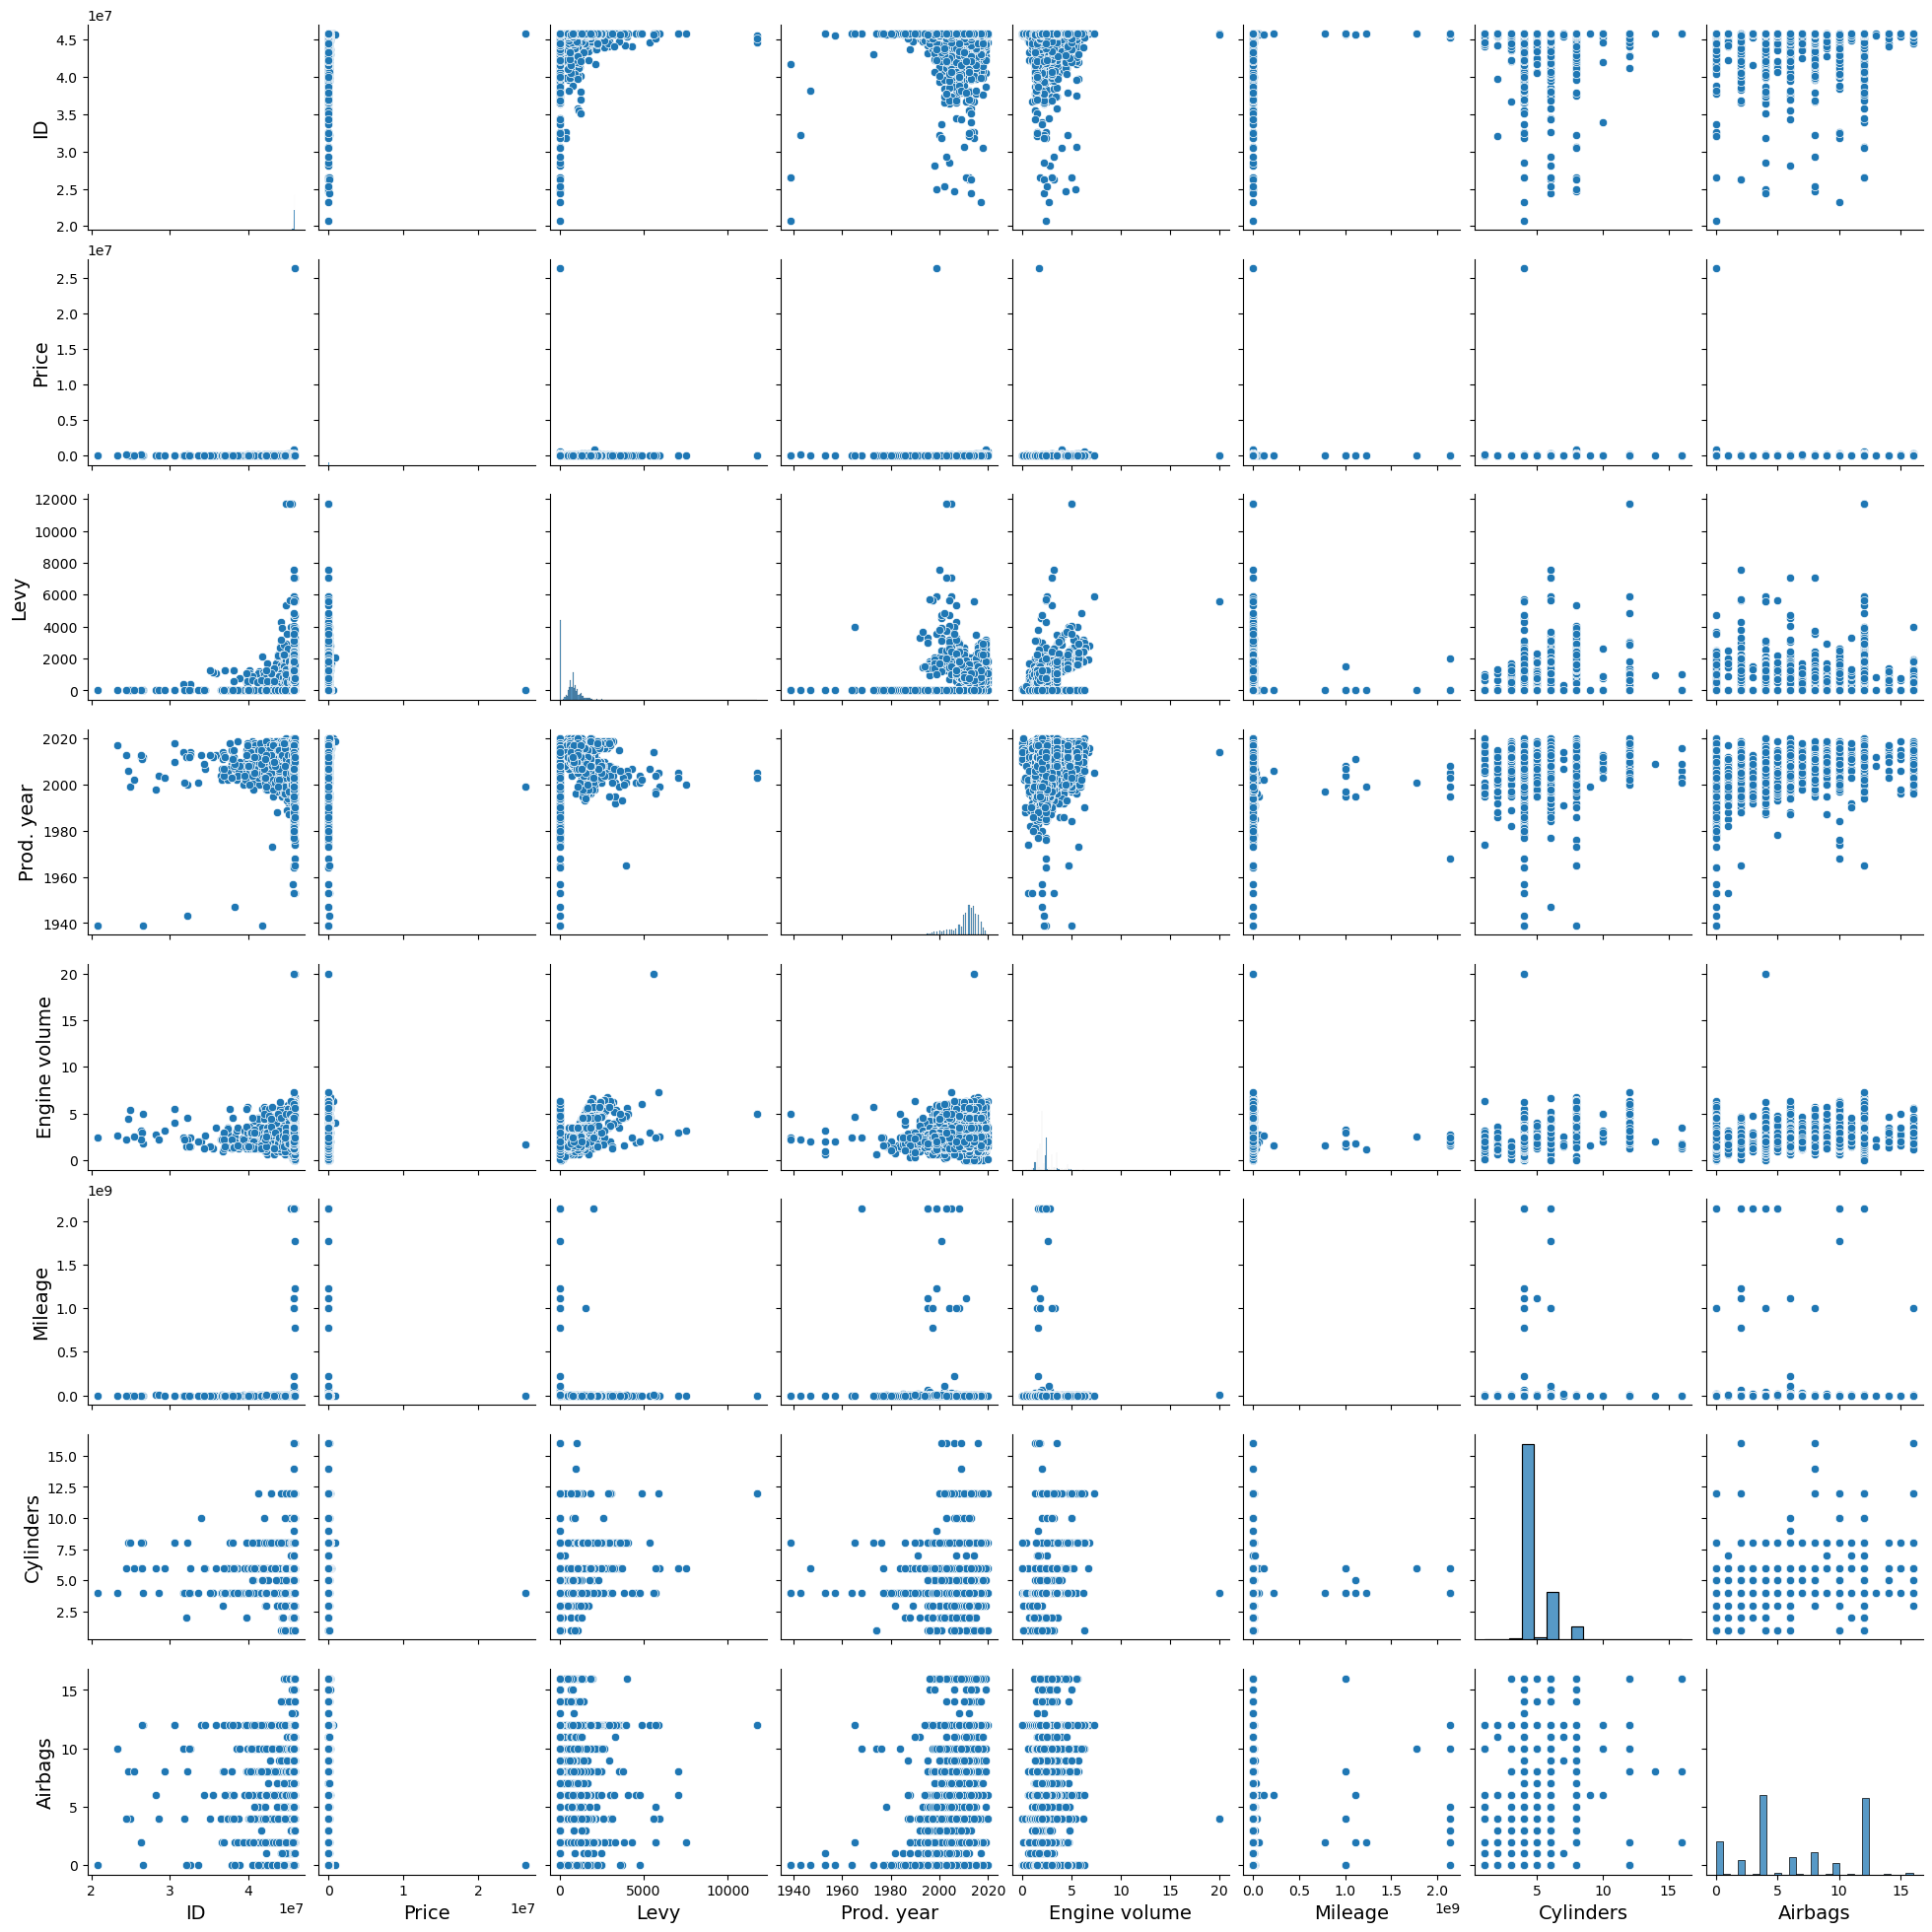

In [19]:
sns.pairplot(car_attributes)

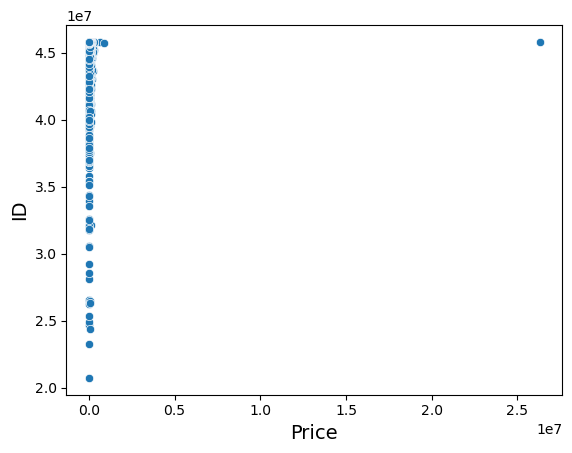

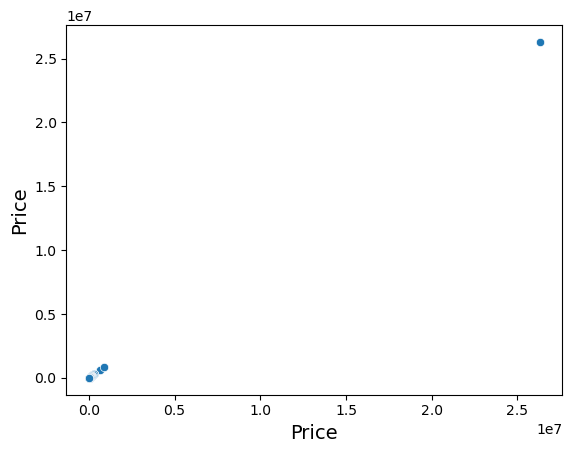

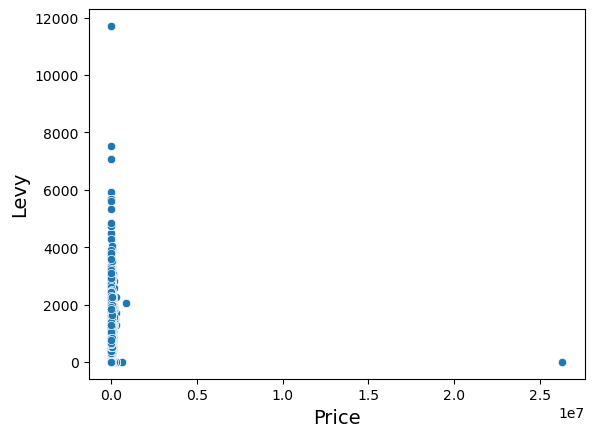

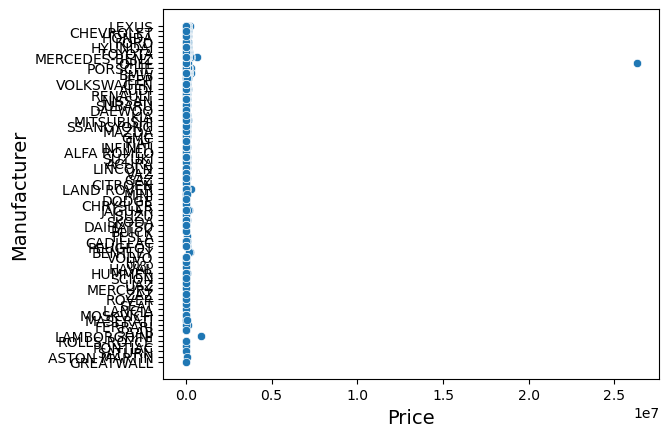

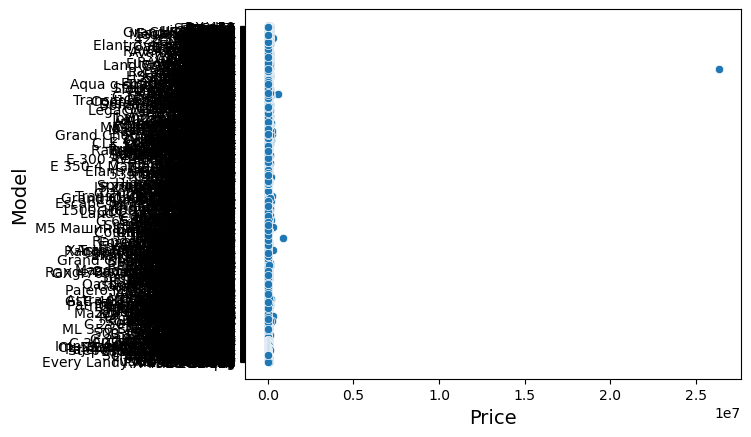

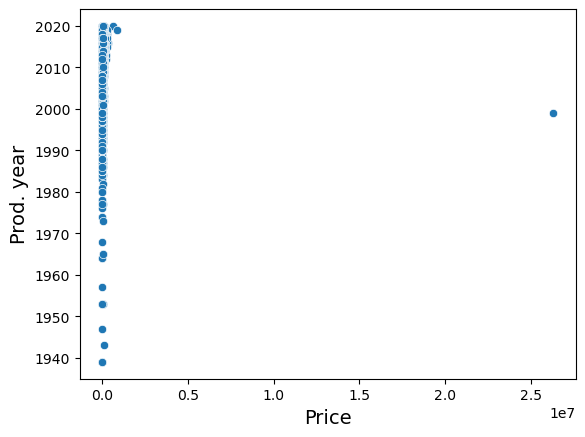

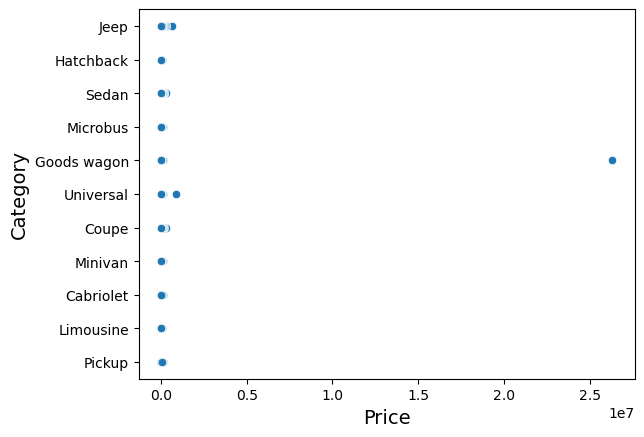

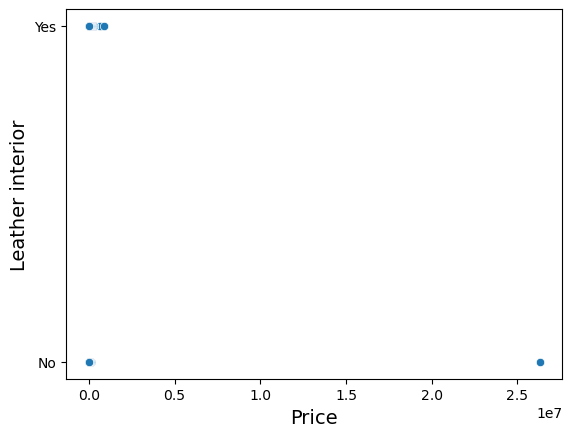

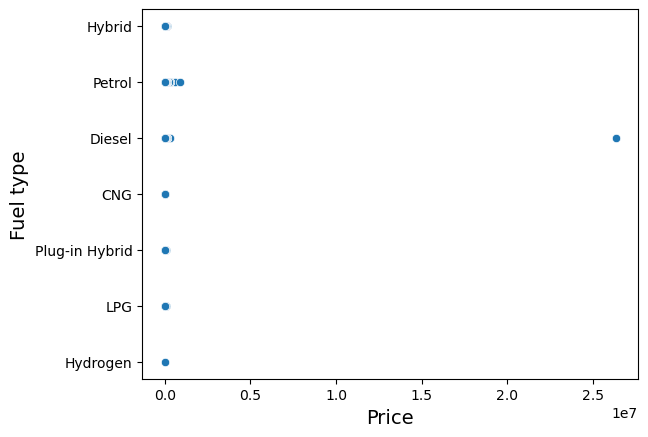

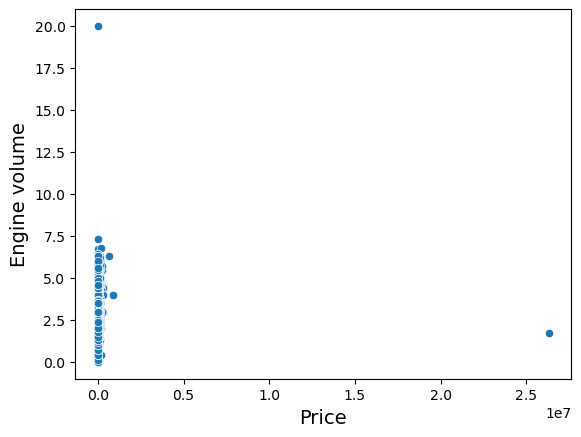

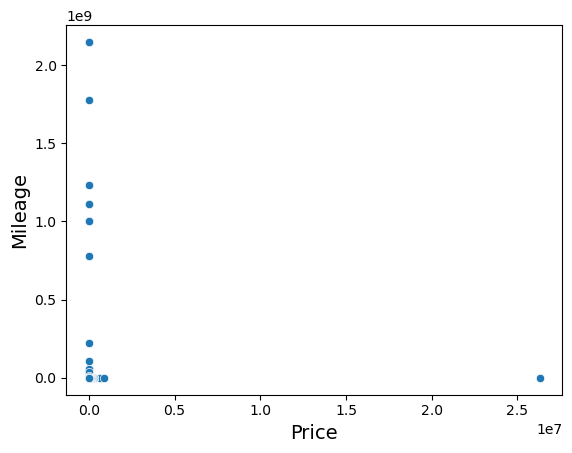

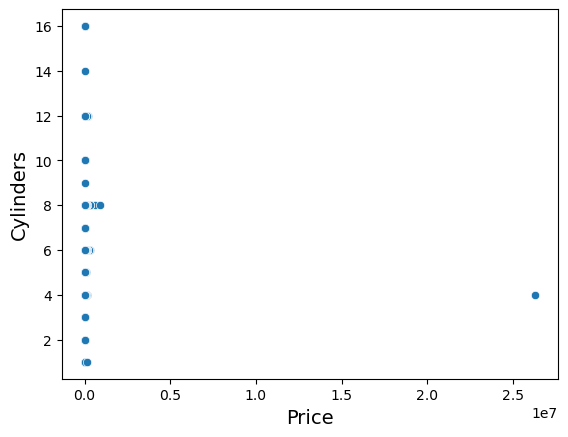

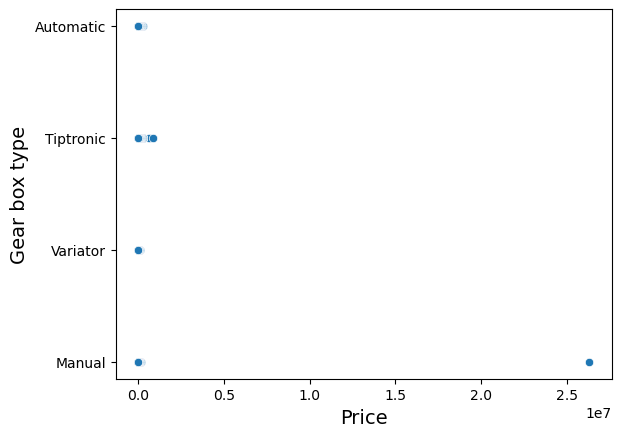

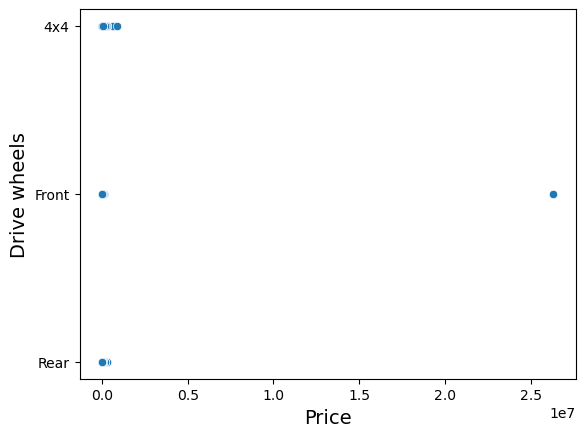

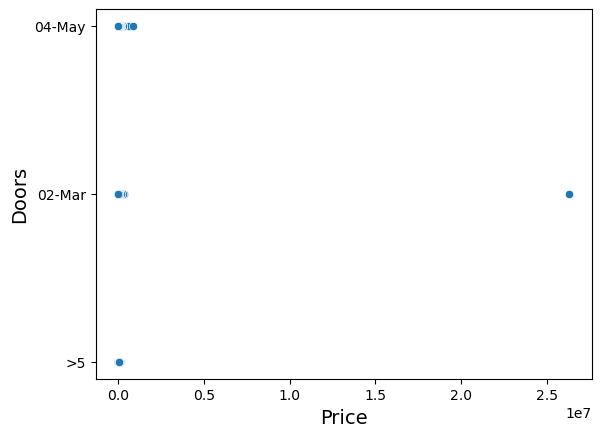

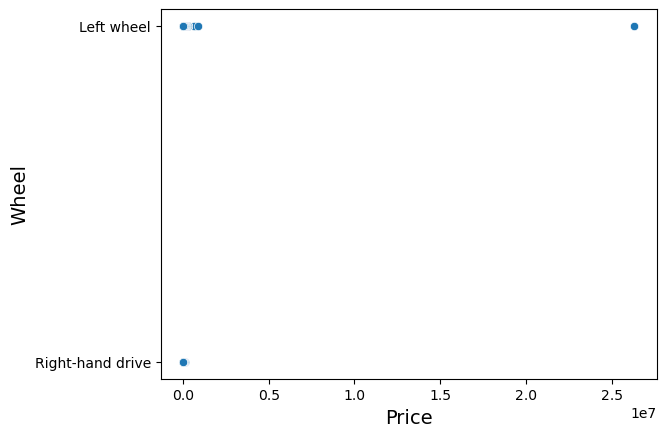

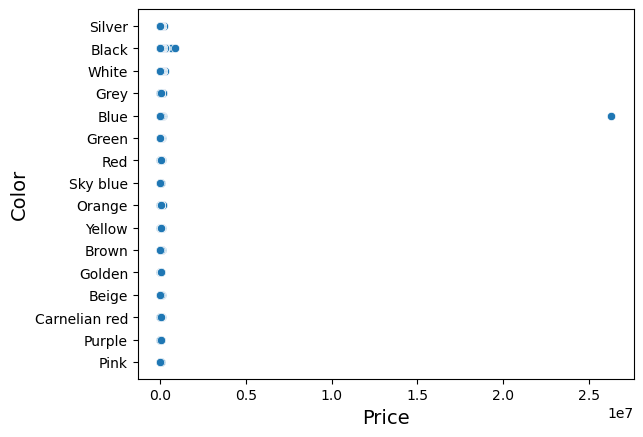

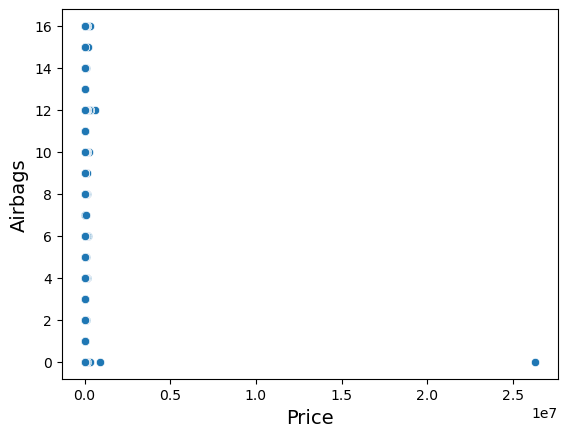

In [20]:
for colname in car_attributes:
  sns.scatterplot(data=car, x="Price", y=colname)
  plt.show()

While there the initial correlation matrix reports minimal results, it is likely that the data needs to be treated and the outliers would have to be removed or analyzed before a model can be fitted. Hence, we will re-analyze the correlation matrix once we have conducted feature engineering and analyzed the categorical variables.

Before we can select the data for train the model, we would have to perform certain steps to train the model. 

Step 1: Treating the outliers: We would use the IQR methodology to deal with the outliers

#Ref: https://www.scaler.com/topics/data-science/handling-outliers-in-data-science/

In [21]:
from collections import Counter 

def detect_outliers(df, n, car_featureslist):
    outlier_indices = [] 
    for i in car_featureslist: 
        Q1 = np.percentile(df[i], 25)
        Q3 = np.percentile(df[i], 75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR 
        outlier_list_col = df[(df[i] < Q1 - outlier_step) | (df[i] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col) 
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(key for key, value in outlier_indices.items() if value > n) 
    return multiple_outliers

drop_outliers = detect_outliers(car, 2, ['Price', 'Levy', 'Prod. year', 'Mileage', 'Cylinders', 'Airbags','Engine volume'])
print("There are the {} indices that will be dropped: ".format(len(drop_outliers)), drop_outliers)

#Ref: https://stackoverflow.com/questions/50461349/how-to-remove-outlier-from-dataframe-using-iqr

There are the 383 indices that will be dropped:  [90, 211, 420, 483, 573, 579, 723, 724, 747, 1019, 1083, 1128, 1225, 1364, 1459, 1490, 1509, 1510, 1562, 1662, 1704, 1823, 2010, 2054, 2283, 2366, 2726, 2768, 2799, 2859, 2912, 2922, 2941, 2942, 2965, 3101, 3365, 3487, 3684, 3686, 3705, 3707, 3765, 3905, 4068, 4183, 4237, 4294, 4351, 4465, 4629, 4649, 4661, 4662, 4705, 4709, 4722, 4919, 5008, 5259, 5412, 5485, 5541, 5718, 5731, 5940, 6335, 6405, 6468, 6768, 6826, 6873, 6887, 6950, 7010, 7031, 7094, 7147, 7247, 7254, 7283, 7318, 7353, 7565, 7621, 7667, 7675, 7747, 7749, 7760, 7970, 7997, 8036, 8147, 8246, 8541, 8644, 8755, 8880, 9101, 9172, 9212, 9233, 9247, 9259, 9327, 9367, 9405, 9441, 9452, 9688, 9739, 10082, 10085, 10220, 10468, 10520, 10690, 10710, 10714, 10759, 10948, 11035, 11038, 11041, 11131, 11138, 11210, 11529, 11827, 11906, 11941, 11973, 12081, 12152, 12224, 12750, 12848, 12905, 12981, 13088, 13320, 13325, 13351, 13467, 13534, 13631, 13653, 13687, 13745, 13847, 13884, 13889, 1

In [22]:
car.iloc[drop_outliers, :]

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
90,45807330,77775,1604,MERCEDES-BENZ,GL 63 AMG,2014,Jeep,Yes,Petrol,5.5,433811.0,8.0,Automatic,4x4,04-May,Left wheel,Black,10
211,45156280,72130,1885,PORSCHE,Panamera,2010,Hatchback,Yes,Petrol,4.8,196800.0,8.0,Tiptronic,4x4,04-May,Left wheel,White,8
420,45763904,81539,1935,LEXUS,GX 460,2016,Jeep,Yes,Petrol,4.6,155976.0,8.0,Automatic,4x4,04-May,Left wheel,White,0
483,45761340,69935,1646,LEXUS,GX 470,2015,Jeep,Yes,Petrol,4.6,273493.0,8.0,Automatic,4x4,04-May,Left wheel,Silver,0
573,45731517,119172,1301,BMW,M6,2014,Coupe,Yes,Petrol,4.4,33500.0,8.0,Tiptronic,Rear,04-May,Left wheel,White,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6513,45756959,27284,0,TOYOTA,Land Cruiser,2004,Jeep,Yes,Diesel,4.2,525000.0,6.0,Manual,4x4,04-May,Left wheel,Black,4
7272,45416515,35438,0,BMW,X6,2009,Jeep,Yes,Petrol,4.4,960000.0,8.0,Tiptronic,4x4,04-May,Left wheel,Silver,12
10973,45416515,35438,0,BMW,X6,2009,Jeep,Yes,Petrol,4.4,960000.0,8.0,Tiptronic,4x4,04-May,Left wheel,Silver,12
13850,45796827,1000,0,MERCEDES-BENZ,GLS 63 AMG,2014,Sedan,Yes,Petrol,6.3,748742.0,1.0,Manual,Front,02-Mar,Left wheel,Black,12


In [23]:
car = car.drop(drop_outliers, axis = 0).reset_index(drop = True) #dropping the outliers and resetting the index

In [24]:
car

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005.0,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,192000.0,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000.0,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966.0,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901.0,4.0,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18849,45798355,8467,0,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0,300000.0,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
18850,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600.0,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
18851,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2.0,116365.0,4.0,Automatic,Front,04-May,Left wheel,Grey,4
18852,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2.0,51258.0,4.0,Automatic,Front,04-May,Left wheel,Black,4


In [25]:
car['Levy'] = car['Levy'].replace(0, np.nan)
levy_index = list(~car['Levy'].isnull())
levy_median = np.median(car['Levy'].loc[levy_index])
levy_median

781.0

In [26]:
car['Levy'].fillna(levy_median, inplace = True)

In [27]:
meanprice_bycategory = car[['Category', 'Price']].groupby('Category', as_index = False).mean()

# Group by 'Mean_Price' and collect 'Category' values into class_1 and class_2
Category_1 = meanprice_bycategory.loc[meanprice_bycategory['Price'] <= 20000, 'Category'].tolist()
Category_2 = meanprice_bycategory.loc[meanprice_bycategory['Price'] > 20000, 'Category'].tolist()

print('Categories with less than or equal to 20000 mean price:', Category_1)
print('Categories with more than 20000 mean price:', Category_2)


Categories with less than or equal to 20000 mean price: ['Coupe', 'Hatchback', 'Limousine', 'Microbus', 'Sedan']
Categories with more than 20000 mean price: ['Cabriolet', 'Goods wagon', 'Jeep', 'Minivan', 'Pickup', 'Universal']


In [28]:
category_data = car['Category']
category_data_new = []

for value in category_data:
    if value in Category_1:
        category_data_new.append(1)
    else:
        category_data_new.append(2)
        
car['Category'] = category_data_new

In [29]:
car

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399.0,LEXUS,RX 450,2010,2,Yes,Hybrid,3.5,186005.0,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018.0,CHEVROLET,Equinox,2011,2,No,Petrol,3.0,192000.0,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,781.0,HONDA,FIT,2006,1,No,Petrol,1.3,200000.0,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862.0,FORD,Escape,2011,2,Yes,Hybrid,2.5,168966.0,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446.0,HONDA,FIT,2014,1,Yes,Petrol,1.3,91901.0,4.0,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18849,45798355,8467,781.0,MERCEDES-BENZ,CLK 200,1999,1,Yes,CNG,2.0,300000.0,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
18850,45778856,15681,831.0,HYUNDAI,Sonata,2011,1,Yes,Petrol,2.4,161600.0,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
18851,45804997,26108,836.0,HYUNDAI,Tucson,2010,2,Yes,Diesel,2.0,116365.0,4.0,Automatic,Front,04-May,Left wheel,Grey,4
18852,45793526,5331,1288.0,CHEVROLET,Captiva,2007,2,Yes,Diesel,2.0,51258.0,4.0,Automatic,Front,04-May,Left wheel,Black,4


In [30]:
#Referencing the output we received from the value_counts code, we can combine the Hybrid, Plig-in Hybrid and Hydrogen into one group and call it and rename it as "Other"
fuel_typedata = car['Fuel type']

new_fueltypedata = ['other' if value in {'Hybrid', 'Hydrogen', 'Plug-in Hybrid'} else value for value in fuel_typedata]
unique_values = set(new_fueltypedata)

car['Fuel type'] = new_fueltypedata

car

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399.0,LEXUS,RX 450,2010,2,Yes,other,3.5,186005.0,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018.0,CHEVROLET,Equinox,2011,2,No,Petrol,3.0,192000.0,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,781.0,HONDA,FIT,2006,1,No,Petrol,1.3,200000.0,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862.0,FORD,Escape,2011,2,Yes,other,2.5,168966.0,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446.0,HONDA,FIT,2014,1,Yes,Petrol,1.3,91901.0,4.0,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18849,45798355,8467,781.0,MERCEDES-BENZ,CLK 200,1999,1,Yes,CNG,2.0,300000.0,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
18850,45778856,15681,831.0,HYUNDAI,Sonata,2011,1,Yes,Petrol,2.4,161600.0,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
18851,45804997,26108,836.0,HYUNDAI,Tucson,2010,2,Yes,Diesel,2.0,116365.0,4.0,Automatic,Front,04-May,Left wheel,Grey,4
18852,45793526,5331,1288.0,CHEVROLET,Captiva,2007,2,Yes,Diesel,2.0,51258.0,4.0,Automatic,Front,04-May,Left wheel,Black,4


Further we would also combine the Automatic and Variator into one category and the other two gear types into another category

Ref: https://idaoffice.org/posts/variator-what-kind-of-thing-is-this/#:~:text=Gears%2C%20between%20which%20the%20variator,has%20a%20lot%20of%20advantages.


In [31]:
gear_data = car['Gear box type']

new_geardata = [1 if value in {'Automatic', 'Variator'} else 2 for value in gear_data]
unique_values = set(new_geardata)

car['Gear box type'] = new_geardata

car

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399.0,LEXUS,RX 450,2010,2,Yes,other,3.5,186005.0,6.0,1,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018.0,CHEVROLET,Equinox,2011,2,No,Petrol,3.0,192000.0,6.0,2,4x4,04-May,Left wheel,Black,8
2,45774419,8467,781.0,HONDA,FIT,2006,1,No,Petrol,1.3,200000.0,4.0,1,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862.0,FORD,Escape,2011,2,Yes,other,2.5,168966.0,4.0,1,4x4,04-May,Left wheel,White,0
4,45809263,11726,446.0,HONDA,FIT,2014,1,Yes,Petrol,1.3,91901.0,4.0,1,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18849,45798355,8467,781.0,MERCEDES-BENZ,CLK 200,1999,1,Yes,CNG,2.0,300000.0,4.0,2,Rear,02-Mar,Left wheel,Silver,5
18850,45778856,15681,831.0,HYUNDAI,Sonata,2011,1,Yes,Petrol,2.4,161600.0,4.0,2,Front,04-May,Left wheel,Red,8
18851,45804997,26108,836.0,HYUNDAI,Tucson,2010,2,Yes,Diesel,2.0,116365.0,4.0,1,Front,04-May,Left wheel,Grey,4
18852,45793526,5331,1288.0,CHEVROLET,Captiva,2007,2,Yes,Diesel,2.0,51258.0,4.0,1,Front,04-May,Left wheel,Black,4


Referencing the output we received from the value_counts code, we we would have to clean the data in the doors column to replace values such as 4-May and 2-Mar

In [32]:
doors_typedata = car['Doors']

new_doortypedata = ['2-3' if value in {'02-Mar'} else '4-5' if value == '04-May' else value for value in doors_typedata]
unique_values = set(new_doortypedata)

car['Doors'] = new_doortypedata

car

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399.0,LEXUS,RX 450,2010,2,Yes,other,3.5,186005.0,6.0,1,4x4,4-5,Left wheel,Silver,12
1,44731507,16621,1018.0,CHEVROLET,Equinox,2011,2,No,Petrol,3.0,192000.0,6.0,2,4x4,4-5,Left wheel,Black,8
2,45774419,8467,781.0,HONDA,FIT,2006,1,No,Petrol,1.3,200000.0,4.0,1,Front,4-5,Right-hand drive,Black,2
3,45769185,3607,862.0,FORD,Escape,2011,2,Yes,other,2.5,168966.0,4.0,1,4x4,4-5,Left wheel,White,0
4,45809263,11726,446.0,HONDA,FIT,2014,1,Yes,Petrol,1.3,91901.0,4.0,1,Front,4-5,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18849,45798355,8467,781.0,MERCEDES-BENZ,CLK 200,1999,1,Yes,CNG,2.0,300000.0,4.0,2,Rear,2-3,Left wheel,Silver,5
18850,45778856,15681,831.0,HYUNDAI,Sonata,2011,1,Yes,Petrol,2.4,161600.0,4.0,2,Front,4-5,Left wheel,Red,8
18851,45804997,26108,836.0,HYUNDAI,Tucson,2010,2,Yes,Diesel,2.0,116365.0,4.0,1,Front,4-5,Left wheel,Grey,4
18852,45793526,5331,1288.0,CHEVROLET,Captiva,2007,2,Yes,Diesel,2.0,51258.0,4.0,1,Front,4-5,Left wheel,Black,4


Further converting the Production year to Age data so that the attribute can be better analyzed

In [33]:
prodyear_data = car['Prod. year']
new_age_data = []

for value in prodyear_data:
    new_age_data.append(2023 - value)
    
car['Age'] = new_age_data


In [34]:
car.drop(['Prod. year'], axis = 1, inplace = True)

car

,ID,Price,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Age
0,45654403,13328,1399.0,LEXUS,RX 450,2,Yes,other,3.5,186005.0,6.0,1,4x4,4-5,Left wheel,Silver,12,13
1,44731507,16621,1018.0,CHEVROLET,Equinox,2,No,Petrol,3.0,192000.0,6.0,2,4x4,4-5,Left wheel,Black,8,12
2,45774419,8467,781.0,HONDA,FIT,1,No,Petrol,1.3,200000.0,4.0,1,Front,4-5,Right-hand drive,Black,2,17
3,45769185,3607,862.0,FORD,Escape,2,Yes,other,2.5,168966.0,4.0,1,4x4,4-5,Left wheel,White,0,12
4,45809263,11726,446.0,HONDA,FIT,1,Yes,Petrol,1.3,91901.0,4.0,1,Front,4-5,Left wheel,Silver,4,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18849,45798355,8467,781.0,MERCEDES-BENZ,CLK 200,1,Yes,CNG,2.0,300000.0,4.0,2,Rear,2-3,Left wheel,Silver,5,24
18850,45778856,15681,831.0,HYUNDAI,Sonata,1,Yes,Petrol,2.4,161600.0,4.0,2,Front,4-5,Left wheel,Red,8,12
18851,45804997,26108,836.0,HYUNDAI,Tucson,2,Yes,Diesel,2.0,116365.0,4.0,1,Front,4-5,Left wheel,Grey,4,13
18852,45793526,5331,1288.0,CHEVROLET,Captiva,2,Yes,Diesel,2.0,51258.0,4.0,1,Front,4-5,Left wheel,Black,4,16


In [35]:
from scipy import stats

columns_to_adjust = ['Levy', 'Age', 'Price', 'Mileage', 'Engine volume']

for column in columns_to_adjust:
    # For other columns, you can apply the transformation directly
    car[column] = [1 if value == 0 else value for value in car[column]]
    # Additional steps for the other columns
    if column in ['Levy', 'Age', 'Price', 'Mileage', 'Engine volume']:
        modified_column, _ = stats.boxcox(car[column])
        car[column] = modified_column
        


In order to apply feature scaling to the datset, the methodology applied here is box-cox transformation to correct for the skewness. 
Ref:(Working with skewed data) https://anshikaaxena.medium.com/how-skewed-data-can-skrew-your-linear-regression-model-accuracy-and-transfromation-can-help-62c6d3fe4c53

In [36]:
car

,ID,Price,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Age
0,45654403,49.647560,7.201868,LEXUS,RX 450,2,Yes,other,1.295043,40.946529,6.0,1,4x4,4-5,Left wheel,Silver,12,2.209502
1,44731507,53.121011,6.887520,CHEVROLET,Equinox,2,No,Petrol,1.131039,41.201952,6.0,2,4x4,4-5,Left wheel,Black,8,2.150286
2,45774419,43.164922,6.625353,HONDA,FIT,1,No,Petrol,0.264186,41.532703,4.0,1,Front,4-5,Right-hand drive,Black,2,2.403890
3,45769185,33.038016,6.722984,FORD,Escape,2,Yes,other,0.938775,40.181360,4.0,1,4x4,4-5,Left wheel,White,0,2.150286
4,45809263,47.731553,6.070764,HONDA,FIT,1,Yes,Petrol,0.264186,35.614096,4.0,1,Front,4-5,Left wheel,Silver,4,1.932725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18849,45798355,43.164922,6.625353,MERCEDES-BENZ,CLK 200,1,Yes,CNG,0.705963,44.946879,4.0,2,Rear,2-3,Left wheel,Silver,5,2.644795
18850,45778856,52.183728,6.686749,HYUNDAI,Sonata,1,Yes,Petrol,0.895979,39.830632,4.0,2,Front,4-5,Left wheel,Red,8,2.150286
18851,45804997,60.948014,6.692684,HYUNDAI,Tucson,2,Yes,Diesel,0.705963,37.327756,4.0,1,Front,4-5,Left wheel,Grey,4,2.209502
18852,45793526,37.368233,7.120145,CHEVROLET,Captiva,2,Yes,Diesel,0.705963,31.661736,4.0,1,Front,4-5,Left wheel,Black,4,2.360503


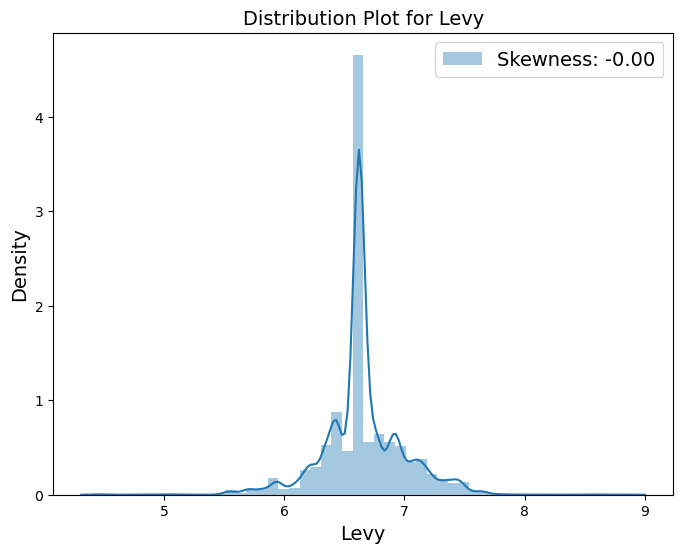

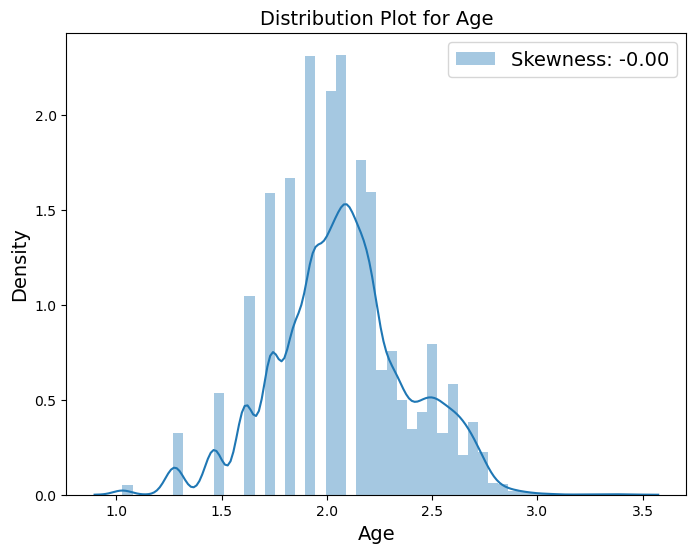

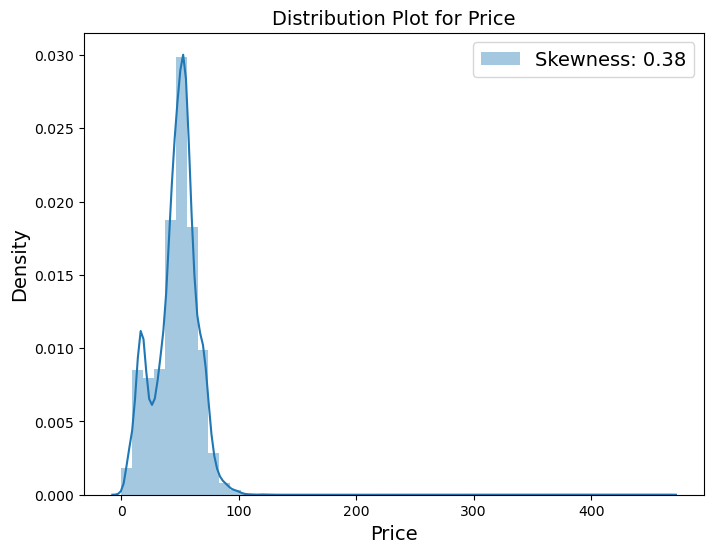

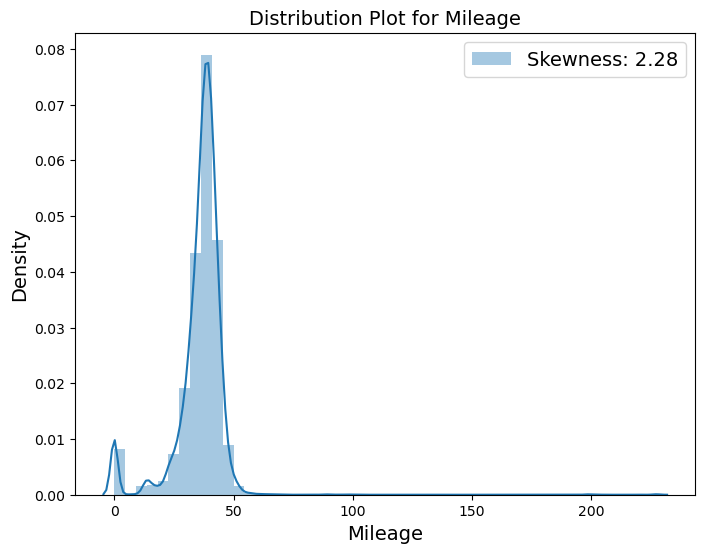

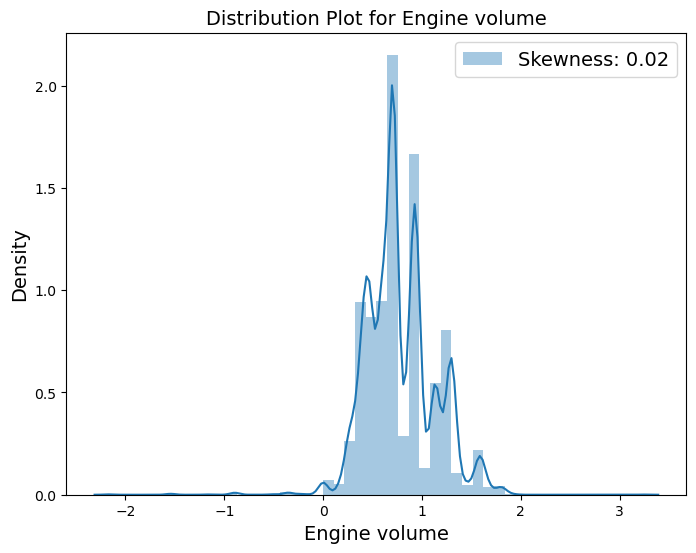

In [37]:
warnings.filterwarnings("ignore")

columns_to_review = ['Levy', 'Age', 'Price', 'Mileage', 'Engine volume']

for i in columns_to_review:
    plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
    sns.distplot(car[i], label='Skewness: %.2f' % (car[i].skew()))
    plt.legend()
    plt.title(f'Distribution Plot for {i}')
    plt.show()
    
warnings.resetwarnings()

After conducting the transformation, we can now notice that the skewness has been taken care of and the data can now be used towards training and testing the model.

In [38]:
car

,ID,Price,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Age
0,45654403,49.647560,7.201868,LEXUS,RX 450,2,Yes,other,1.295043,40.946529,6.0,1,4x4,4-5,Left wheel,Silver,12,2.209502
1,44731507,53.121011,6.887520,CHEVROLET,Equinox,2,No,Petrol,1.131039,41.201952,6.0,2,4x4,4-5,Left wheel,Black,8,2.150286
2,45774419,43.164922,6.625353,HONDA,FIT,1,No,Petrol,0.264186,41.532703,4.0,1,Front,4-5,Right-hand drive,Black,2,2.403890
3,45769185,33.038016,6.722984,FORD,Escape,2,Yes,other,0.938775,40.181360,4.0,1,4x4,4-5,Left wheel,White,0,2.150286
4,45809263,47.731553,6.070764,HONDA,FIT,1,Yes,Petrol,0.264186,35.614096,4.0,1,Front,4-5,Left wheel,Silver,4,1.932725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18849,45798355,43.164922,6.625353,MERCEDES-BENZ,CLK 200,1,Yes,CNG,0.705963,44.946879,4.0,2,Rear,2-3,Left wheel,Silver,5,2.644795
18850,45778856,52.183728,6.686749,HYUNDAI,Sonata,1,Yes,Petrol,0.895979,39.830632,4.0,2,Front,4-5,Left wheel,Red,8,2.150286
18851,45804997,60.948014,6.692684,HYUNDAI,Tucson,2,Yes,Diesel,0.705963,37.327756,4.0,1,Front,4-5,Left wheel,Grey,4,2.209502
18852,45793526,37.368233,7.120145,CHEVROLET,Captiva,2,Yes,Diesel,0.705963,31.661736,4.0,1,Front,4-5,Left wheel,Black,4,2.360503


In [39]:
car.corr()

/var/folders/1r/4rz_ktkd1r30hx6t62xt8zzw0000gn/T/ipykernel_75835/2754339606.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  car.corr()


,ID,Price,Levy,Category,Engine volume,Mileage,Cylinders,Gear box type,Airbags,Age
ID,1.000000,0.023950,0.001361,0.013203,0.002594,0.017979,-0.034945,-0.075694,-0.020249,-0.041954
Price,0.023950,1.000000,-0.002287,0.171508,0.003240,-0.045081,-0.055562,0.158970,-0.099048,-0.228173
Levy,0.001361,-0.002287,1.000000,0.234161,0.521253,0.001351,0.389134,-0.004487,0.099413,0.005809
Category,0.013203,0.171508,0.234161,1.000000,0.276533,0.009925,0.174085,-0.049303,-0.102504,-0.017266
Engine volume,0.002594,0.003240,0.521253,0.276533,1.000000,0.076301,0.695431,0.045820,0.262260,0.033336
Mileage,0.017979,-0.045081,0.001351,0.009925,0.076301,1.000000,0.044053,-0.017132,0.005463,0.149203
Cylinders,-0.034945,-0.055562,0.389134,0.174085,0.695431,0.044053,1.000000,0.090804,0.194144,0.123297
Gear box type,-0.075694,0.158970,-0.004487,-0.049303,0.045820,-0.017132,0.090804,1.000000,0.036558,0.346772
Airbags,-0.020249,-0.099048,0.099413,-0.102504,0.262260,0.005463,0.194144,0.036558,1.000000,-0.216015
Age,-0.041954,-0.228173,0.005809,-0.017266,0.033336,0.149203,0.123297,0.346772,-0.216015,1.000000


In order to convert the categorical variables into numerical values, we will be using the one hot encoder technique

Ref - Code from chapter 2 of Hands-on Machine Learning with Scikit-Learn, Keras and TensorFlow (3rd edition).

In [40]:
car_dataset_encoded = pd.get_dummies(data = car, columns = ['Category', 'Fuel type', 'Gear box type', 'Doors', 'Wheel'])
car_dataset_encoded

,ID,Price,Levy,Manufacturer,Model,Leather interior,Engine volume,Mileage,Cylinders,Drive wheels,...,Fuel type_LPG,Fuel type_Petrol,Fuel type_other,Gear box type_1,Gear box type_2,Doors_2-3,Doors_4-5,Doors_>5,Wheel_Left wheel,Wheel_Right-hand drive
0,45654403,49.647560,7.201868,LEXUS,RX 450,Yes,1.295043,40.946529,6.0,4x4,...,0,0,1,1,0,0,1,0,1,0
1,44731507,53.121011,6.887520,CHEVROLET,Equinox,No,1.131039,41.201952,6.0,4x4,...,0,1,0,0,1,0,1,0,1,0
2,45774419,43.164922,6.625353,HONDA,FIT,No,0.264186,41.532703,4.0,Front,...,0,1,0,1,0,0,1,0,0,1
3,45769185,33.038016,6.722984,FORD,Escape,Yes,0.938775,40.181360,4.0,4x4,...,0,0,1,1,0,0,1,0,1,0
4,45809263,47.731553,6.070764,HONDA,FIT,Yes,0.264186,35.614096,4.0,Front,...,0,1,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18849,45798355,43.164922,6.625353,MERCEDES-BENZ,CLK 200,Yes,0.705963,44.946879,4.0,Rear,...,0,0,0,0,1,1,0,0,1,0
18850,45778856,52.183728,6.686749,HYUNDAI,Sonata,Yes,0.895979,39.830632,4.0,Front,...,0,1,0,0,1,0,1,0,1,0
18851,45804997,60.948014,6.692684,HYUNDAI,Tucson,Yes,0.705963,37.327756,4.0,Front,...,0,0,0,1,0,0,1,0,1,0
18852,45793526,37.368233,7.120145,CHEVROLET,Captiva,Yes,0.705963,31.661736,4.0,Front,...,0,0,0,1,0,0,1,0,1,0


We would dropping the below columns, as they would not be impacting the price of a vehicle

In [41]:
car_dataset_encoded.drop(['ID', 'Manufacturer', 'Model', 'Leather interior', 'Drive wheels', 'Color'], axis = 1, inplace = True)

In [42]:
car_dataset_encoded

,Price,Levy,Engine volume,Mileage,Cylinders,Airbags,Age,Category_1,Category_2,Fuel type_CNG,...,Fuel type_LPG,Fuel type_Petrol,Fuel type_other,Gear box type_1,Gear box type_2,Doors_2-3,Doors_4-5,Doors_>5,Wheel_Left wheel,Wheel_Right-hand drive
0,49.647560,7.201868,1.295043,40.946529,6.0,12,2.209502,0,1,0,...,0,0,1,1,0,0,1,0,1,0
1,53.121011,6.887520,1.131039,41.201952,6.0,8,2.150286,0,1,0,...,0,1,0,0,1,0,1,0,1,0
2,43.164922,6.625353,0.264186,41.532703,4.0,2,2.403890,1,0,0,...,0,1,0,1,0,0,1,0,0,1
3,33.038016,6.722984,0.938775,40.181360,4.0,0,2.150286,0,1,0,...,0,0,1,1,0,0,1,0,1,0
4,47.731553,6.070764,0.264186,35.614096,4.0,4,1.932725,1,0,0,...,0,1,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18849,43.164922,6.625353,0.705963,44.946879,4.0,5,2.644795,1,0,1,...,0,0,0,0,1,1,0,0,1,0
18850,52.183728,6.686749,0.895979,39.830632,4.0,8,2.150286,1,0,0,...,0,1,0,0,1,0,1,0,1,0
18851,60.948014,6.692684,0.705963,37.327756,4.0,4,2.209502,0,1,0,...,0,0,0,1,0,0,1,0,1,0
18852,37.368233,7.120145,0.705963,31.661736,4.0,4,2.360503,0,1,0,...,0,0,0,1,0,0,1,0,1,0


In [43]:
car_label = car["Price"]
car_model_attributes = car_dataset_encoded.drop(columns = ["Price"], errors = "ignore")

In [44]:
car_label

0        49.647560
1        53.121011
2        43.164922
3        33.038016
4        47.731553
           ...    
18849    43.164922
18850    52.183728
18851    60.948014
18852    37.368233
18853    16.872588
Name: Price, Length: 18854, dtype: float64

In [45]:
car_model_attributes

,Levy,Engine volume,Mileage,Cylinders,Airbags,Age,Category_1,Category_2,Fuel type_CNG,Fuel type_Diesel,Fuel type_LPG,Fuel type_Petrol,Fuel type_other,Gear box type_1,Gear box type_2,Doors_2-3,Doors_4-5,Doors_>5,Wheel_Left wheel,Wheel_Right-hand drive
0,7.201868,1.295043,40.946529,6.0,12,2.209502,0,1,0,0,0,0,1,1,0,0,1,0,1,0
1,6.887520,1.131039,41.201952,6.0,8,2.150286,0,1,0,0,0,1,0,0,1,0,1,0,1,0
2,6.625353,0.264186,41.532703,4.0,2,2.403890,1,0,0,0,0,1,0,1,0,0,1,0,0,1
3,6.722984,0.938775,40.181360,4.0,0,2.150286,0,1,0,0,0,0,1,1,0,0,1,0,1,0
4,6.070764,0.264186,35.614096,4.0,4,1.932725,1,0,0,0,0,1,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18849,6.625353,0.705963,44.946879,4.0,5,2.644795,1,0,1,0,0,0,0,0,1,1,0,0,1,0
18850,6.686749,0.895979,39.830632,4.0,8,2.150286,1,0,0,0,0,1,0,0,1,0,1,0,1,0
18851,6.692684,0.705963,37.327756,4.0,4,2.209502,0,1,0,1,0,0,0,1,0,0,1,0,1,0
18852,7.120145,0.705963,31.661736,4.0,4,2.360503,0,1,0,1,0,0,0,1,0,0,1,0,1,0


### Question D: Select 20% of the data for testing. Describe how you did that and verify that your test portion of the data is representative of the entire dataset.

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
## We use train_test_split with parameter shuffle set to True and test_size as 0.2 in order to randomly select 20% of data as our test set and conversely 80% as train
X_train, X_test, y_train, y_test = train_test_split(car_model_attributes, car_label, test_size=0.20, random_state=42, shuffle=True)

In [48]:
X_train_numerical = X_train.select_dtypes(include=np.number)
X_test_numerical = X_test.select_dtypes(include=np.number)

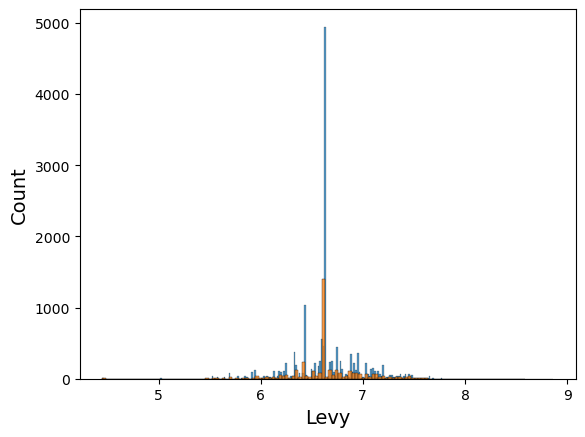

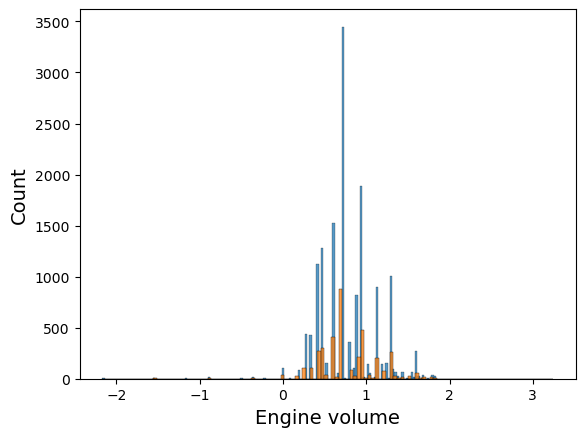

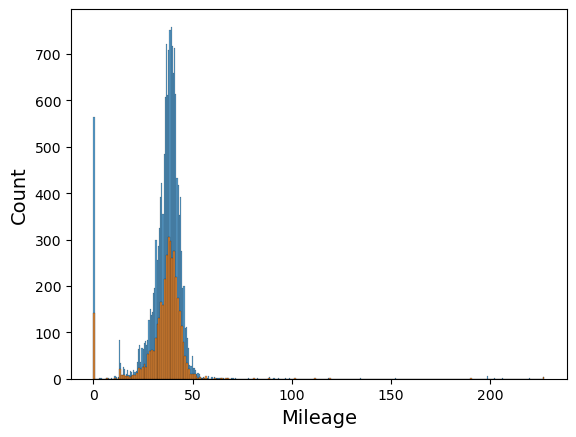

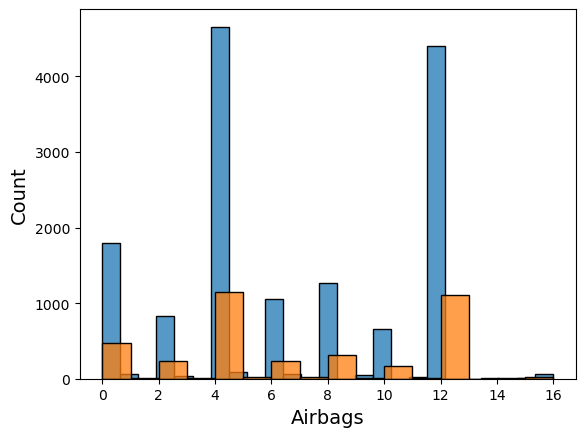

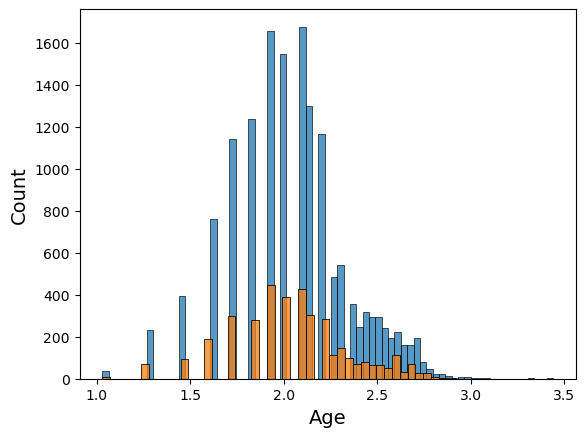

In [49]:
car_model_numerical = ['Levy','Engine volume','Mileage','Airbags','Age']

for colname in car_model_numerical:
      plt.subplot(111)
      sns.histplot(data=X_train_numerical,x=colname)

      plt.subplot(111)
      sns.histplot(data=X_test_numerical,x=colname)

      plt.show()

From the above distribution set, we can analyze that our test set and train set follow similar patterns and hence we can verify that we have randomly picked a representative train and test set

In [50]:
X_train

,Levy,Engine volume,Mileage,Cylinders,Airbags,Age,Category_1,Category_2,Fuel type_CNG,Fuel type_Diesel,Fuel type_LPG,Fuel type_Petrol,Fuel type_other,Gear box type_1,Gear box type_2,Doors_2-3,Doors_4-5,Doors_>5,Wheel_Left wheel,Wheel_Right-hand drive
15843,6.625353,0.705963,40.549739,4.0,8,2.552685,0,1,1,0,0,0,0,0,1,0,1,0,0,1
14682,6.625353,0.596985,37.861362,6.0,12,2.013272,1,0,0,0,0,1,0,0,1,0,1,0,1,0
8953,6.625353,0.705963,36.219356,4.0,12,2.672663,0,1,0,0,1,0,0,1,0,0,1,0,0,1
9623,6.686749,0.895979,37.083329,4.0,6,2.150286,0,1,0,0,0,1,0,1,0,0,1,0,1,0
638,6.692684,0.705963,38.010142,4.0,4,2.209502,0,1,0,1,0,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,6.622816,0.938775,40.075783,4.0,12,2.013272,1,0,0,0,0,0,1,1,0,0,1,0,1,0
11964,6.604872,0.705963,44.533389,4.0,4,1.841473,1,0,0,0,1,0,0,1,0,0,1,0,1,0
5390,6.526852,0.705963,38.103222,4.0,4,2.150286,1,0,0,0,0,1,0,1,0,0,1,0,1,0
860,6.765659,0.895979,0.000000,4.0,0,1.841473,1,0,0,0,0,1,0,1,0,0,1,0,1,0


In [51]:
y_train = pd.DataFrame(y_train, columns=['Price'])

y_train

,Price
15843,44.132076
14682,63.231601
8953,39.921886
9623,55.725908
638,49.348201
...,...
11284,58.320330
11964,47.338228
5390,53.639592
860,51.534978


### Question E: Train a Linear Regression model using the training data with four-fold cross-validation using appropriate evaluation metric. Do this with a closed-form solution (using the Normal Equation or SVD) and with SGD. Perform Ridge, Lasso and Elastic Net regularization – try a few values of penalty term and describe its impact. Explore the impact of other hyperparameters, like batch size and learning rate (no need for grid search). Describe your findings. For SGD, display the training and validation loss as a function of training iteration.

In [52]:
#Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

kf = KFold(n_splits=4)
lin_reg = LinearRegression()
# Create a list to store the performance metrics (e.g., Mean Squared Error) for each iteration
performance_metrics = []

for train_index, test_index in kf.split(X_train):
    X_train_kFold, X_test_kFold = X_train.iloc[train_index,:], X_train.iloc[test_index,:]
    y_train_kFold, y_test_kFold = y_train.iloc[train_index], y_train.iloc[test_index]


  # Fit the linear regression model on the training data
    lin_reg.fit(X_train_kFold, y_train_kFold)

  # Make predictions on the test data
    y_pred_kFold = lin_reg.predict(X_test_kFold)

  # Calculate the Mean Squared Error for this iteration
    mse = mean_squared_error(y_test_kFold, y_pred_kFold)

    performance_metrics.append(mse)

# Calculate the average performance metric across all iterations
average_performance = np.mean(performance_metrics)

In [53]:
average_performance

250.7248551398091

The evaluation metric used throughout the project, is mean squared error. Based on the above training results, the average mse for the multi-linear model is 250.7248551398091

In [54]:
lin_reg.predict(X_test)

array([[47.57603856],
       [38.80014893],
       [34.0037786 ],
       ...,
       [46.02848233],
       [41.82593644],
       [33.42105592]])

In [55]:
X_train = X_train.values
y_train = y_train.values

In [56]:
# As asked in the question, we would be running a four-fold valiadation, hence define the number of folds (k)
k = 4

# Storing the theta values for each fold
theta_values = []

# Initialize KFold cross-validator
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Initialize an empty list to store the MSE values for each fold
mse_values = []

# Perform k-fold cross-validation
for train_index, test_index in kf.split(X_train):
    X_train_fold, X_val_fold = X_train[train_index], X_train[test_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[test_index]

    # Calculating the coefficients using the normal equation
    X_transpose = np.transpose(X_train_fold)
    X_transpose_X = np.dot(X_transpose, X_train_fold)
    X_transpose_X_inv = np.linalg.inv(X_transpose_X)
    X_transpose_y = np.dot(X_transpose, y_train_fold)
    theta = np.dot(X_transpose_X_inv, X_transpose_y)

    # Append the theta values for this fold to the list
    theta_values.append(theta)

    # Make predictions using the calculated theta values
    y_val_pred = np.dot(X_val_fold, theta)

    # Calculate and append the MSE for this fold
    mse_fold = mean_squared_error(y_val_fold, y_val_pred)
    mse_values.append(mse_fold)

# Calculate the average coefficients (theta) across all folds
average_theta = np.mean(theta_values, axis=0)

# Calculate the average MSE across all folds
average_mse = np.mean(mse_values)

print("Average Coefficients (theta) across all folds:", average_theta)
print("Average MSE across all folds:", average_mse)


Average Coefficients (theta) across all folds: [[-3.76984682e+02]
 [ 1.28918102e+02]
 [ 5.91208288e+00]
 [-2.16076864e+01]
 [ 6.88947221e+00]
 [ 5.20481079e+02]
 [-6.39323726e+16]
 [-6.39323726e+16]
 [ 4.92806878e+16]
 [ 4.92806878e+16]
 [ 4.92806878e+16]
 [ 4.92806878e+16]
 [ 4.92806878e+16]
 [ 1.18550030e+16]
 [ 1.18550030e+16]
 [ 2.79668170e+15]
 [ 2.79668170e+15]
 [ 2.79668170e+15]
 [-2.62400000e+03]
 [-2.56800000e+03]]
Average MSE across all folds: 361054.73779043125


While the MSE from OLS is representative of the data, the MSE arrived at from using the normal equation is unrealistically high. In order to take this account, we would be conducting performing regularization techniques, such that the mse is more representative of the data.

Final Mean Squared Error (SGD): 59156393640.71866


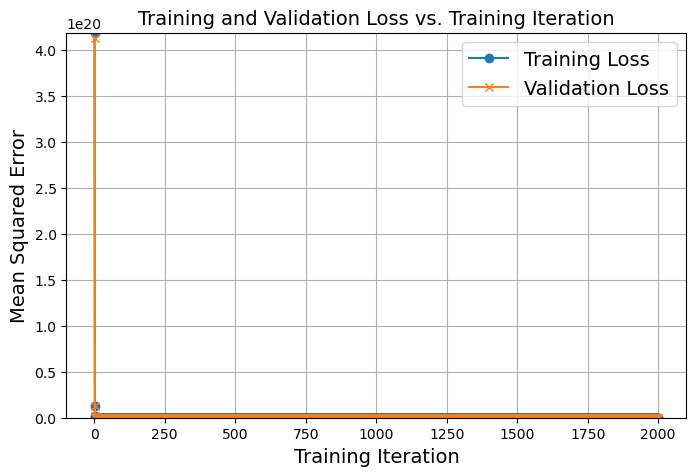

Final Mean Squared Error (SGD): 269511236045.3755


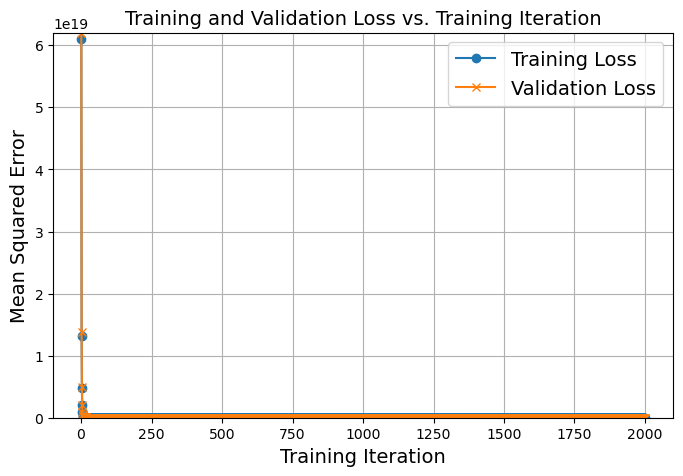

Final Mean Squared Error (SGD): 1351.2974080321453


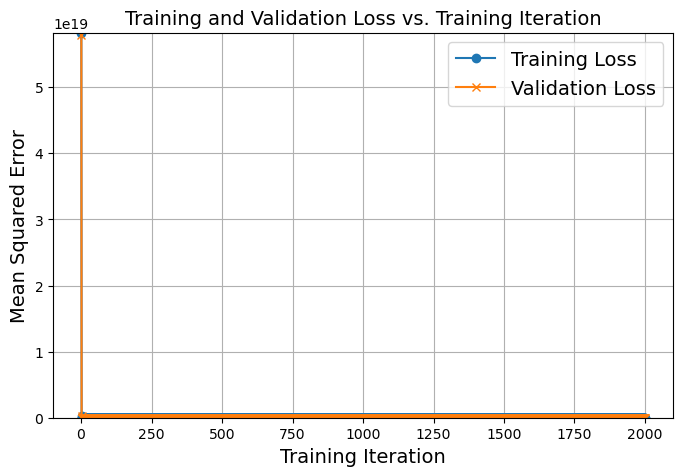

Early stopping at iteration 454 due to no improvement in validation loss.
Early stopping at iteration 6 due to no improvement in validation loss.
Early stopping at iteration 6 due to no improvement in validation loss.
Final Mean Squared Error (SGD): 321.25075035925784


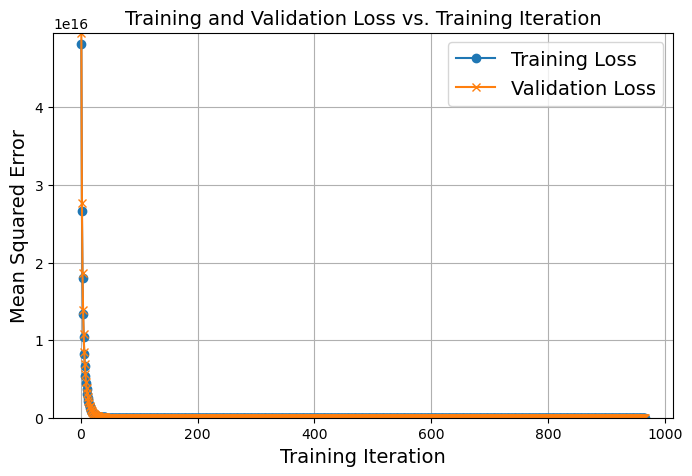

Early stopping at iteration 96 due to no improvement in validation loss.
Early stopping at iteration 6 due to no improvement in validation loss.
Early stopping at iteration 6 due to no improvement in validation loss.
Early stopping at iteration 6 due to no improvement in validation loss.
Final Mean Squared Error (SGD): 340.5961580549421


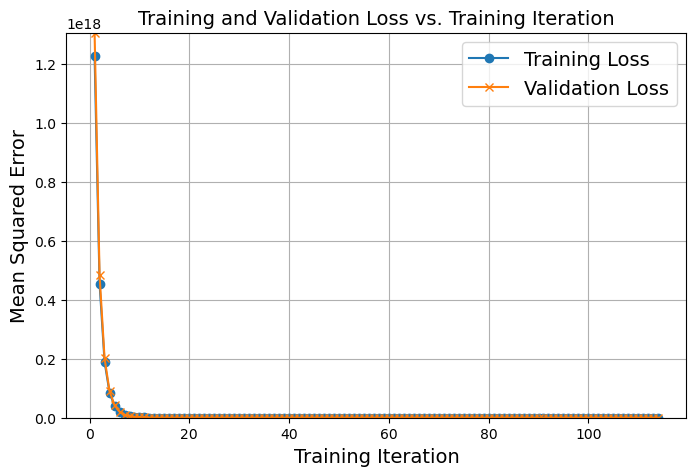

In [57]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold

warnings.filterwarnings("ignore")

# Define the number of folds (k)
k = 4

# Create the SGDRegressor model with appropriate hyperparameters
alphaList = [0.001, 0.01, 0.1, 1, 10]
for alpha in alphaList:
    sgd_model = SGDRegressor(loss='squared_error', alpha=alpha, max_iter=500, random_state=42)

    # Initialize lists to store training and validation loss
    training_loss = []
    validation_loss = []

    # Initialize KFold cross-validator
    kf = KFold(n_splits=k, shuffle=True, random_state=42)

    for train_index, test_index in kf.split(X_train):
        X_train_fold, X_val_fold = X_train[train_index], X_train[test_index]
        y_train_fold, y_val_fold = y_train[train_index], y_train[test_index]

        # Number of training iterations
        n_iterations = 500

        # Early stopping parameters
        early_stopping_rounds = 5  # Number of iterations with no improvement to wait before stopping
        best_val_loss = float('inf')  # Initialize the best validation loss to positive infinity
        no_improvement_count = 0  # Initialize the count of iterations with no improvement

        for iteration in range(n_iterations):
            # Fit the model for one iteration (one pass through the training data)
            sgd_model.partial_fit(X_train_fold, y_train_fold)

            # Predict on the training data
            y_train_pred = sgd_model.predict(X_train_fold)

            # Calculate training loss (Mean Squared Error) and append to the list
            train_loss = mean_squared_error(y_train_fold, y_train_pred)
            training_loss.append(train_loss)

            # Predict on the validation data
            y_val_pred = sgd_model.predict(X_val_fold)

            # Calculate validation loss (Mean Squared Error) and append to the list
            val_loss = mean_squared_error(y_val_fold, y_val_pred)
            validation_loss.append(val_loss)

            # Check for early stopping
            if val_loss < best_val_loss:
                best_val_loss = val_loss
                no_improvement_count = 0
            else:
                no_improvement_count += 1

            if no_improvement_count >= early_stopping_rounds:
                print(f"Early stopping at iteration {iteration + 1} due to no improvement in validation loss.")
                break

    # Plot training and validation loss as a function of training iteration
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, len(training_loss) + 1), training_loss, label='Training Loss', marker='o')
    plt.plot(range(1, len(validation_loss) + 1), validation_loss, label='Validation Loss', marker='x')
    plt.xlabel('Training Iteration')
    plt.ylabel('Mean Squared Error')
    plt.title('Training and Validation Loss vs. Training Iteration')
    plt.legend()
    plt.grid()
    
    
    # Set the y-axis limit (change the values as needed)
    y_limit = (0.5, max(max(training_loss), max(validation_loss)))
    plt.ylim(y_limit)
    
    # Final model evaluation
    y_pred_sgd = sgd_model.predict(X_test)
    final_mse = mean_squared_error(y_test, y_pred_sgd)
    print("Final Mean Squared Error (SGD):", final_mse)
    
    plt.show()

warnings.resetwarnings()


One of the inferences we can make from the training and validation loss, is that it is conducting a good fit. However, one of the disadvantage of SGD Regression model is that it sensitive to the features having different scales of data. This could be one of the reasons that could explain the high MSE.
Ref: https://scikit-learn.org/stable/modules/sgd.html

Note: Standard Scaler or MinMaxScaler has anot been applied as the feature engineering was already performed on the dataset using box-ocox while we were controlling for the skewness.

In [58]:
# Analyzing the mean scores
print(f"Mean MSE: {np.mean(final_mse)}")

Mean MSE: 340.5961580549421


Alpha = 0.001
Lasso Regression Mean CV MSE: 250.78712824661574
Ridge Regression Mean CV MSE: 250.78997356091526
===
Alpha = 0.01
Lasso Regression Mean CV MSE: 250.78582231486007
Ridge Regression Mean CV MSE: 250.7899664275362
===
Alpha = 0.1
Lasso Regression Mean CV MSE: 251.38818553682682
Ridge Regression Mean CV MSE: 250.789895644287
===
Alpha = 1.0
Lasso Regression Mean CV MSE: 285.54851057400396
Ridge Regression Mean CV MSE: 250.7892426774809
===
Alpha = 10.0
Lasso Regression Mean CV MSE: 316.8640941772081
Ridge Regression Mean CV MSE: 250.78801862355635
===


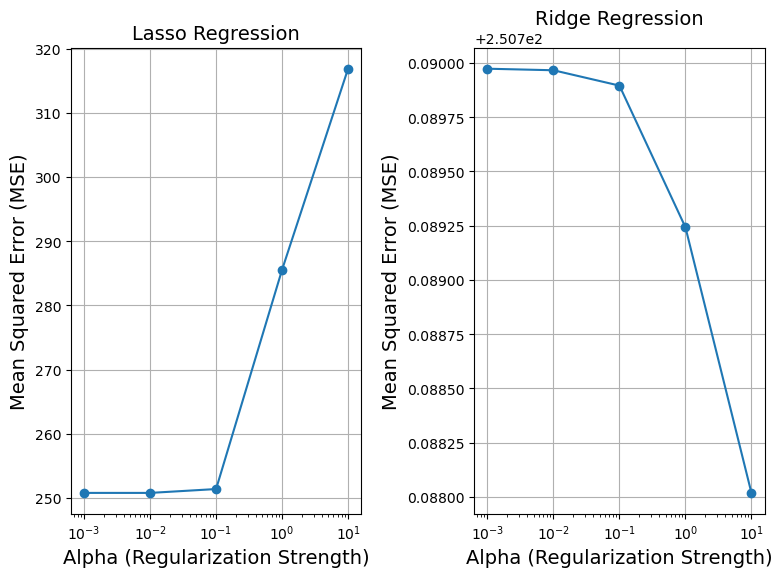

In [59]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

# Define a list of alpha values to try
alphas = [0.001, 0.01, 0.1, 1.0, 10.0]

# Initialize empty lists to store the MSE values
lasso_mse_values = []
ridge_mse_values = []

for alpha in alphas:
    lasso_mse_fold = []
    ridge_mse_fold = []

    for train_index, test_index in kf.split(X_train):
        X_train_fold, X_test_fold = X_train[train_index], X_train[test_index]
        y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]

        # Create Lasso and Ridge models with the current alpha
        lasso_reg = Lasso(alpha=alpha)
        ridge_reg = Ridge(alpha=alpha)

        # Fit the Lasso model
        lasso_reg.fit(X_train_fold, y_train_fold)

        # Make predictions with the trained Lasso model
        lasso_predictions = lasso_reg.predict(X_test_fold)

        # Calculate MSE for Lasso
        lasso_mse = mean_squared_error(y_test_fold, lasso_predictions)
        lasso_mse_fold.append(lasso_mse)

        # Fit the Ridge model
        ridge_reg.fit(X_train_fold, y_train_fold)

        # Make predictions with the trained Ridge model
        ridge_predictions = ridge_reg.predict(X_test_fold)

        # Calculate MSE for Ridge
        ridge_mse = mean_squared_error(y_test_fold, ridge_predictions)
        ridge_mse_fold.append(ridge_mse)

    # Calculate the mean MSE across the four folds for each alpha
    lasso_mse_values.append(np.mean(lasso_mse_fold))
    ridge_mse_values.append(np.mean(ridge_mse_fold))

    # Print the MSE values for each alpha
    print(f"Alpha = {alpha}")
    print("Lasso Regression Mean CV MSE:", np.mean(lasso_mse_fold))
    print("Ridge Regression Mean CV MSE:", np.mean(ridge_mse_fold))
    print("===")

# Create individual plots for each regularization technique
plt.figure(figsize=(12, 6))

# Lasso Regression Plot
plt.subplot(131)
plt.semilogx(alphas, lasso_mse_values, marker='o')
plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Lasso Regression')
plt.grid(True)

# Ridge Regression Plot
plt.subplot(132)
plt.semilogx(alphas, ridge_mse_values, marker='o')
plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Ridge Regression')
plt.grid(True)

plt.tight_layout()
plt.show()

warnings.resetwarnings()


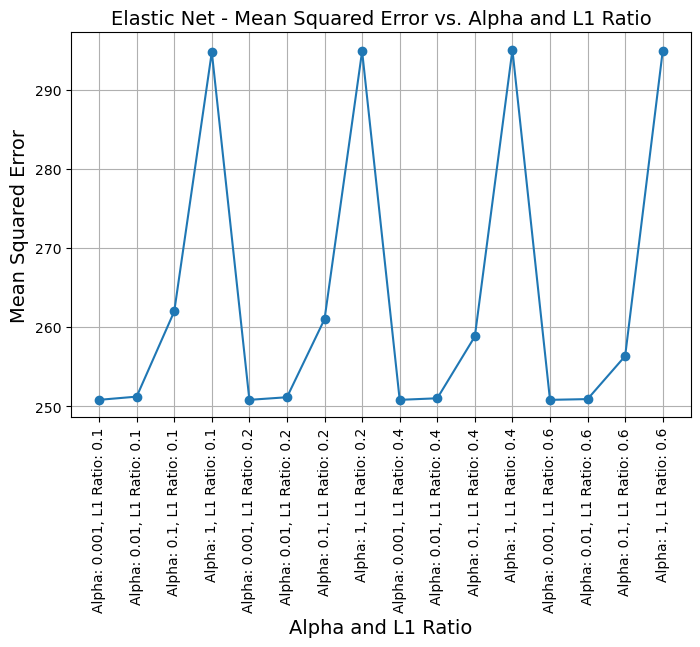

In [60]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold

warnings.filterwarnings("ignore")

# Define the number of folds (k)
k = 4

# Create lists of alpha (regularization strength) and l1_ratio (L1 mixing parameter)
alpha_list = [0.001, 0.01, 0.1, 1]
l1_ratio_list = [0.1, 0.2, 0.4, 0.6]  # Different L1 ratios for Elastic Net

alpha_l1_list = []  # Store alpha and l1_ratio combinations
elastic_mse_vals = []  # Store Elastic Net MSE values

for l1_ratio in l1_ratio_list:
    for alpha in alpha_list:
        elastic_net_model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, max_iter=200, random_state=42)

        # Initialize KFold cross-validator
        kf = KFold(n_splits=k, shuffle=True, random_state=42)
        
        fold_training_losses = []  # Store training losses for each fold
        fold_validation_losses = []  # Store validation losses for each fold

        for train_index, test_index in kf.split(X_train):  # You should replace X_train with your actual training data
            X_train_fold, X_test_fold = X_train[train_index], X_train[test_index]
            y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]

            # Fit the Elastic Net model
            elastic_net_model.fit(X_train_fold, y_train_fold)

            # Predict on the training data
            y_train_pred = elastic_net_model.predict(X_train_fold)

            # Calculate training loss (Mean Squared Error) and append to the list
            train_loss = mean_squared_error(y_train_fold, y_train_pred)
            fold_training_losses.append(train_loss)

            # Predict on the validation data
            y_val_pred = elastic_net_model.predict(X_test_fold)

            # Calculate validation loss (Mean Squared Error) and append to the list
            val_loss = mean_squared_error(y_test_fold, y_val_pred)
            fold_validation_losses.append(val_loss)
        
        # Calculate the mean training and validation loss across folds for this alpha
        mean_training_loss = np.mean(fold_training_losses)
        mean_validation_loss = np.mean(fold_validation_losses)  # Fix this line
        
        alpha_l1_list.append((alpha, l1_ratio))
        elastic_mse_vals.append(mean_validation_loss)


# Plot training and validation loss as a function of alpha
plt.figure(figsize=(8, 5))
plt.plot(range(len(alpha_l1_list)), elastic_mse_vals, marker='o')
plt.xticks(range(len(alpha_l1_list)), [f"Alpha: {alpha}, L1 Ratio: {l1_ratio}" for alpha, l1_ratio in alpha_l1_list], rotation=90)
plt.xlabel('Alpha and L1 Ratio')
plt.ylabel('Mean Squared Error')
plt.title('Elastic Net - Mean Squared Error vs. Alpha and L1 Ratio')
plt.grid()
plt.show()

warnings.resetwarnings()


After running the Ridge, Lasso and Elastic Net Regularization techniques, we can make the following inferences regarding it's impact:

- We can notice that as the alpha value increases, the mean CV MSE is also increasing. Thus implying that higher values of alpha lead to more regularization, thereby increasing bias and decreasing variance. This would lead to under-fitting the model
- Further, Lasso can be best used when the dataset has features with poor predictive power. While ridge regression is useful for the grouping effect, in which colinear features can be selected together. Further evaluation would be conducted during the file model evaluation, as to decide which model would best predict the price of the car given the features.

Ref: https://towardsdatascience.com/regularization-in-deep-learning-l1-l2-and-dropout-377e75acc036

In [61]:
X_train.shape

(15083, 20)

In [62]:
# Inside the minibatch_gradient_descent function
def minibatch_gradient_descent(X, y, theta, lr, n_iter, batch_size, gradient_clip_threshold):
    cost_history = []
    for _ in range(n_iter):
        indices = np.random.choice(len(X), batch_size, replace=False)
        X_batch = X[indices]
        y_batch = y[indices]
        gradient = (1 / batch_size) * X_batch.T.dot(X_batch.dot(theta) - y_batch)
        
        # Clip gradients to prevent extreme updates
        gradient = np.clip(gradient, -gradient_clip_threshold, gradient_clip_threshold)
        
        theta -= lr * gradient
        cost = np.mean((X.dot(theta) - y) ** 2)
        cost_history.append(cost)
    return theta, cost_history


In [63]:
X_train.shape

(15083, 20)

#### Trial one: Batch Size - 20 and Learning Rate = 0.1

Predictions for fold: 1
Intercept value: 5.625893832459101 
Weight values: [[ 4.92944497]
 [-2.46666201]
 [ 0.16910987]
 [-0.28277652]
 [-0.15361621]
 [-4.55657919]
 [ 4.77485435]
 [ 7.98626133]
 [-2.6176143 ]
 [10.34134463]
 [ 7.21733247]
 [ 4.01966064]
 [ 0.57780019]
 [ 2.62688943]
 [10.71322657]
 [ 0.53880457]
 [ 4.51300852]
 [ 3.27129833]
 [ 5.66799615]
 [ 2.13194657]]
Mean Square Error: 357.176 

Predictions for fold: 2
Intercept value: 5.090359866033951 
Weight values: [[ 4.3491479 ]
 [-3.52279082]
 [ 0.0193452 ]
 [ 0.05827932]
 [-0.45810625]
 [-3.23960355]
 [ 2.33518459]
 [ 6.2217895 ]
 [-4.10303755]
 [10.79103191]
 [ 7.14699443]
 [ 4.02425126]
 [ 0.73990764]
 [ 2.00899113]
 [11.42349786]
 [ 1.8716997 ]
 [ 5.55489429]
 [ 2.07881377]
 [ 6.82134208]
 [ 1.21903569]]
Mean Square Error: 320.867 

Predictions for fold: 3
Intercept value: 7.660526636261999 
Weight values: [[ 4.42536772]
 [-2.81139661]
 [-0.21237567]
 [-0.55057953]
 [-0.25753381]
 [-3.80416554]
 [ 4.5172334 ]
 [ 8.44441

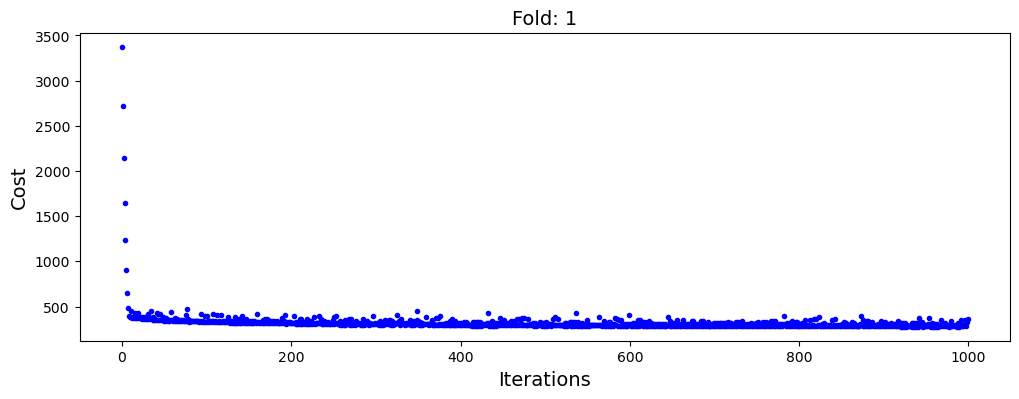

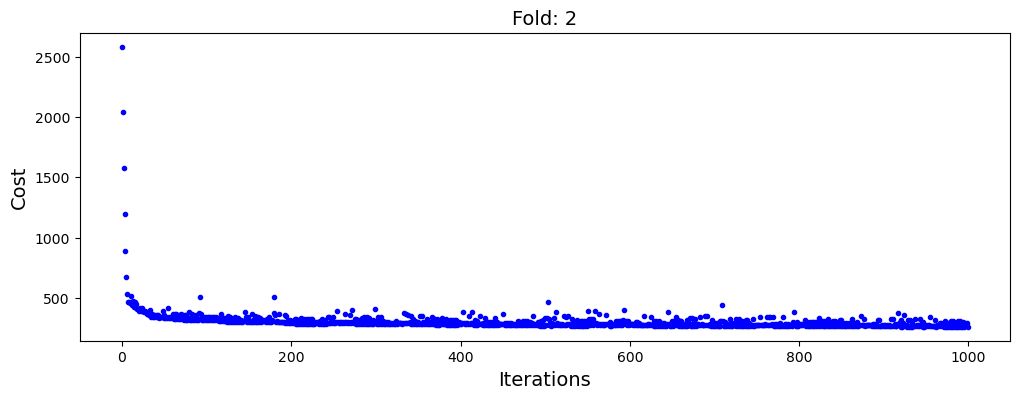

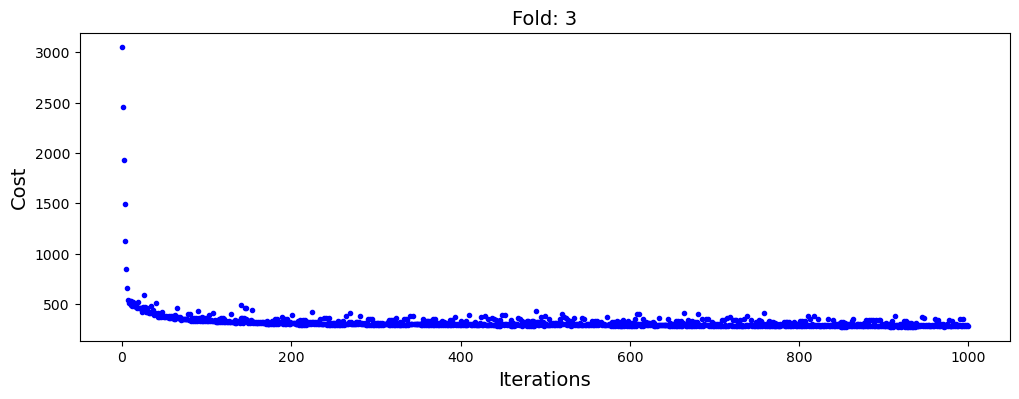

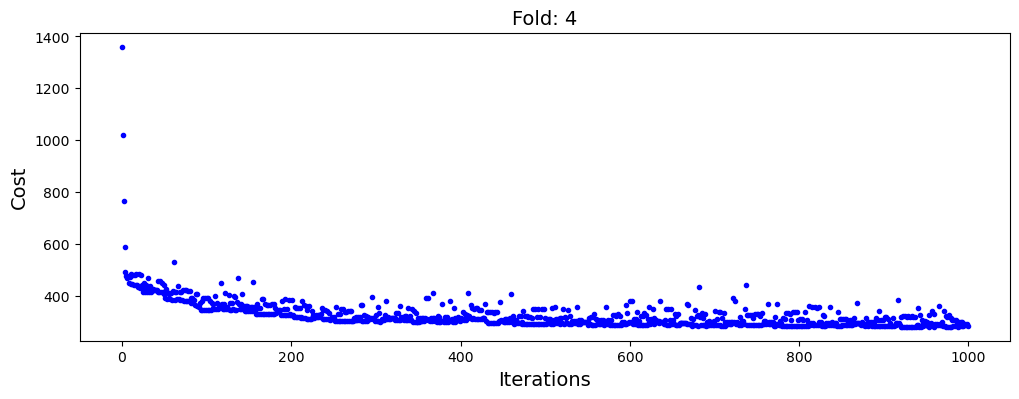

In [64]:
i = 1
gradient_clip_threshold = 1.0  # Adjust this threshold as needed

for train_index, val_index in kf.split(X_train):
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]
    
    # Add bias column to fold data
    X_train_fold = np.c_[np.ones((len(X_train_fold), 1)), X_train_fold]
    X_val_fold = np.c_[np.ones((len(X_val_fold), 1)), X_val_fold]
    
    lr = 0.1
    n_iter = 1000
    batch_size = 20
    theta = np.random.randn(21, 1)  

    # Train the model using minibatch gradient descent with gradient clipping
    theta, cost_history = minibatch_gradient_descent(X_train_fold, y_train_fold, theta, lr, n_iter, batch_size, gradient_clip_threshold)

    print('Predictions for fold:', i)
    print('Intercept value:', theta[0, 0], '\nWeight values:', theta[1:])
    
    # Use the validation data and mean square error to evaluate performance
    N = len(y_val_fold)
    y_hat = np.dot(X_val_fold, theta)
    mse_val = (1 / N) * (np.sum(np.square(y_hat - y_val_fold)))
    print('Mean Square Error:', round(mse_val, 3), '\n')
    
    fig, ax = plt.subplots(figsize=(12, 4))
    plt.title('Fold: ' + str(i))
    ax.set_ylabel('Cost')
    ax.set_xlabel('Iterations')
    _ = ax.plot(range(n_iter), cost_history, 'b.')
    
    i += 1

#### Trial two: Batch size - 52 , learning rate= 0.01

Predictions for fold: 1
Intercept value: 3.4823756213925043 
Weight values: [[ 3.78999689]
 [-0.34474204]
 [ 0.03953982]
 [ 0.39779175]
 [-0.09431354]
 [ 1.98932566]
 [ 1.65966839]
 [ 4.8112342 ]
 [-0.57821786]
 [ 6.0267099 ]
 [ 2.00109905]
 [ 1.57671159]
 [-1.81165885]
 [ 0.14417832]
 [ 4.75197115]
 [ 0.4759259 ]
 [ 3.30082506]
 [ 1.82718247]
 [ 3.28419102]
 [-1.91181558]]
Mean Square Error: 286.675 

Predictions for fold: 2
Intercept value: 2.8613417343115897 
Weight values: [[ 2.43034603]
 [ 0.93410583]
 [ 0.20073323]
 [ 1.85310293]
 [-0.28036003]
 [-0.08395264]
 [ 1.90223986]
 [ 4.30853368]
 [-0.93119937]
 [ 5.53059959]
 [ 1.48199036]
 [ 1.465059  ]
 [-2.41581859]
 [ 0.89735998]
 [ 5.59734549]
 [ 0.49459913]
 [ 2.64852527]
 [-0.56952782]
 [ 4.28664903]
 [ 0.20002385]]
Mean Square Error: 353.234 

Predictions for fold: 3
Intercept value: 2.5804760946672562 
Weight values: [[ 2.50702025]
 [ 0.62463466]
 [ 0.14372769]
 [ 1.50134999]
 [-0.10825506]
 [ 2.07596491]
 [ 0.37851841]
 [ 2.95

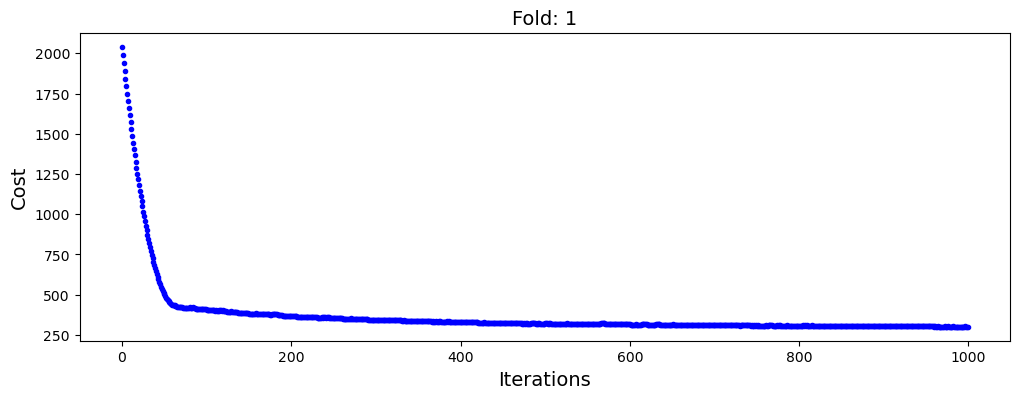

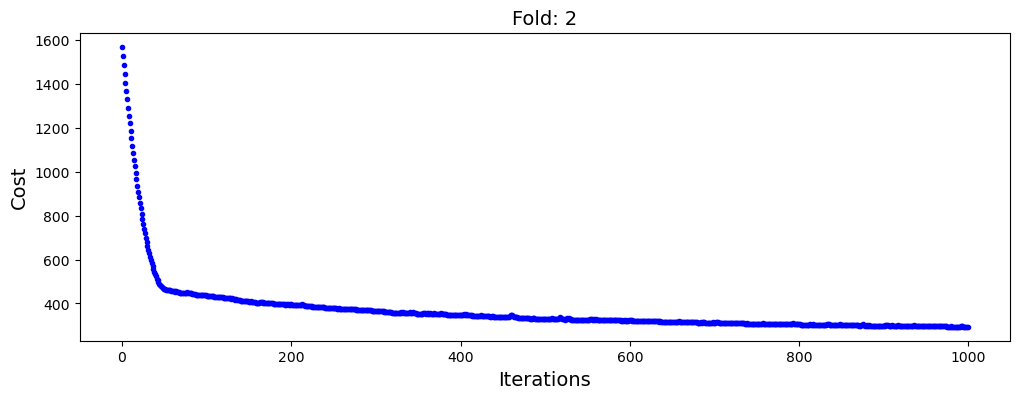

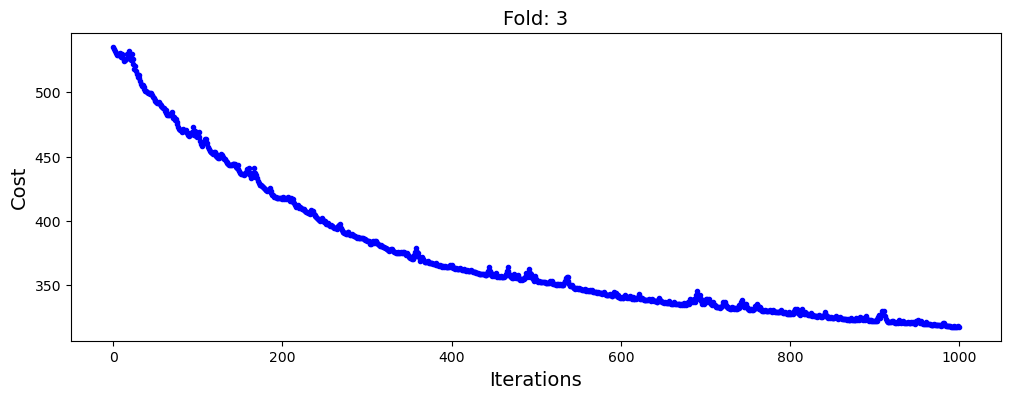

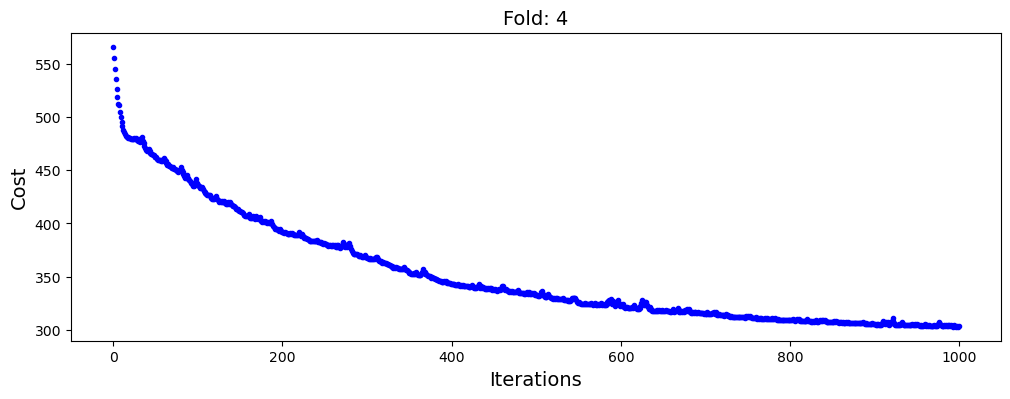

In [65]:
i = 1
gradient_clip_threshold = 1.0  # Adjust this threshold as needed

for train_index, val_index in kf.split(X_train):
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]
    
    # Add bias column to fold data
    X_train_fold = np.c_[np.ones((len(X_train_fold), 1)), X_train_fold]
    X_val_fold = np.c_[np.ones((len(X_val_fold), 1)), X_val_fold]
    lr = 0.01
    n_iter = 1000
    batch_size = 52
    theta = np.random.randn(21, 1)  # Initialize coefficients (matching the number of features + bias)

    # Train the model using minibatch gradient descent with gradient clipping
    theta, cost_history = minibatch_gradient_descent(X_train_fold, y_train_fold, theta, lr, n_iter, batch_size, gradient_clip_threshold)

    print('Predictions for fold:', i)
    print('Intercept value:', theta[0, 0], '\nWeight values:', theta[1:])
    
    # Use the validation data and mean square error to evaluate performance
    N = len(y_val_fold)
    y_hat = np.dot(X_val_fold, theta)
    mse_val = (1 / N) * (np.sum(np.square(y_hat - y_val_fold)))
    print('Mean Square Error:', round(mse_val, 3), '\n')
    
    fig, ax = plt.subplots(figsize=(12, 4))
    plt.title('Fold: ' + str(i))
    ax.set_ylabel('Cost')
    ax.set_xlabel('Iterations')
    _ = ax.plot(range(n_iter), cost_history, 'b.')
    
    i += 1

#### Trail 3: Batch Size - 68, Learning rate - 0.01

Predictions for fold: 1
Intercept value: 2.4845864500559163 
Weight values: [[ 2.76896161]
 [ 1.79893079]
 [ 0.18616859]
 [ 0.41256697]
 [-0.09772892]
 [ 1.38816851]
 [ 0.38260693]
 [ 3.4697551 ]
 [ 0.27390833]
 [ 5.79058214]
 [ 1.14369616]
 [ 1.95908014]
 [-2.10753723]
 [ 1.43925294]
 [ 5.98434825]
 [ 1.36260253]
 [ 3.74001184]
 [ 2.18186081]
 [ 4.09681512]
 [ 0.47748894]]
Mean Square Error: 294.045 

Predictions for fold: 2
Intercept value: 4.325823179403423 
Weight values: [[ 2.89843261]
 [ 0.71814976]
 [ 0.0356586 ]
 [ 1.23941503]
 [-0.21656822]
 [ 1.00402597]
 [ 1.31142613]
 [ 3.88200914]
 [-0.67924255]
 [ 6.42343846]
 [ 2.577098  ]
 [ 2.51435793]
 [-1.19169275]
 [ 1.51469716]
 [ 5.85745798]
 [ 2.23195009]
 [ 4.85406999]
 [ 1.25139069]
 [ 2.77759661]
 [-0.96546652]]
Mean Square Error: 344.051 

Predictions for fold: 3
Intercept value: 2.028108478993636 
Weight values: [[ 3.16828489]
 [-0.04196573]
 [ 0.09589617]
 [ 1.18465383]
 [-0.23843413]
 [ 1.82136131]
 [-0.49459665]
 [ 1.9320

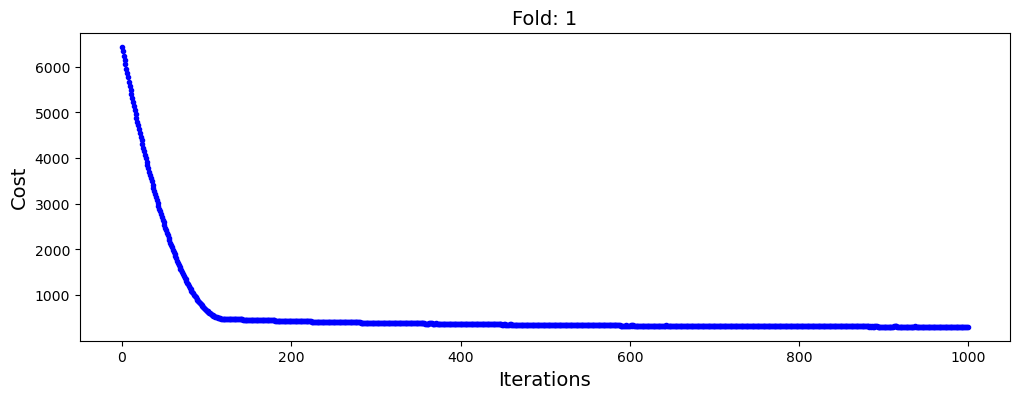

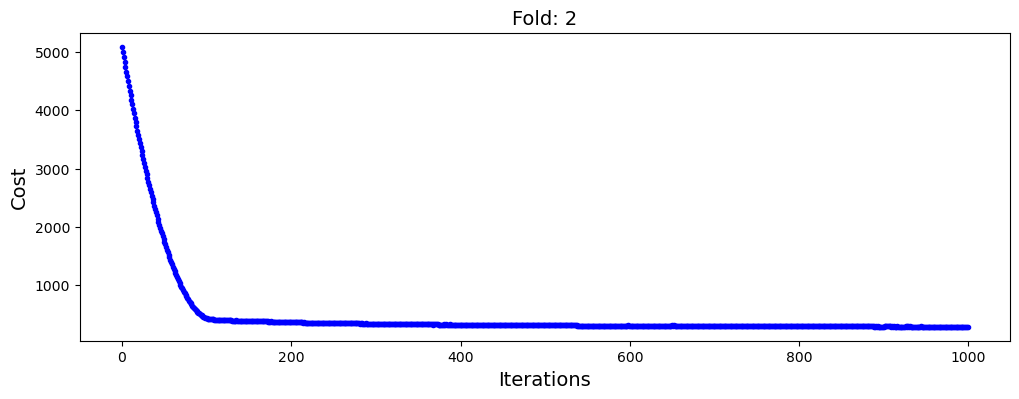

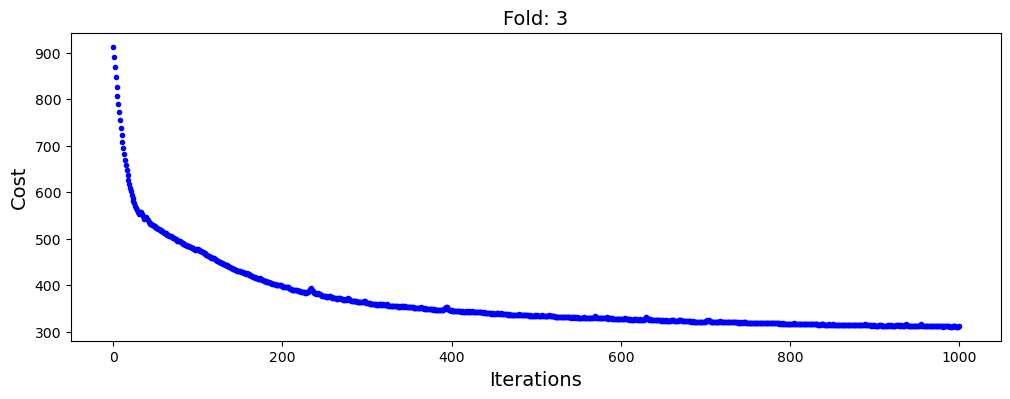

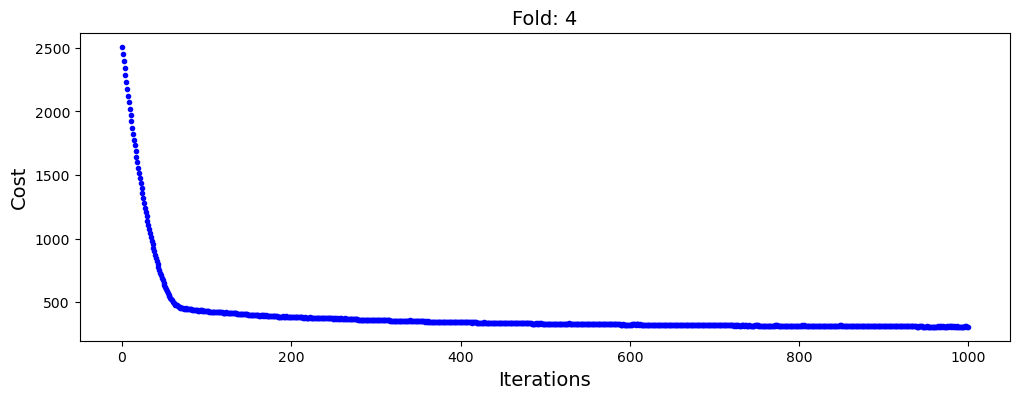

In [66]:
i = 1
gradient_clip_threshold = 1.0  # Adjust this threshold as needed

for train_index, val_index in kf.split(X_train):
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]
    
    # Add bias column to fold data
    X_train_fold = np.c_[np.ones((len(X_train_fold), 1)), X_train_fold]
    X_val_fold = np.c_[np.ones((len(X_val_fold), 1)), X_val_fold]
    
    lr = 0.01
    n_iter = 1000
    batch_size = 68
    theta = np.random.randn(21, 1)  # Initialize coefficients (matching the number of features + bias)

    # Train the model using minibatch gradient descent with gradient clipping
    theta, cost_history = minibatch_gradient_descent(X_train_fold, y_train_fold, theta, lr, n_iter, batch_size, gradient_clip_threshold)

    print('Predictions for fold:', i)
    print('Intercept value:', theta[0, 0], '\nWeight values:', theta[1:])
    
    # Use the validation data and mean square error to evaluate performance
    N = len(y_val_fold)
    y_hat = np.dot(X_val_fold, theta)
    mse_val = (1 / N) * (np.sum(np.square(y_hat - y_val_fold)))
    print('Mean Square Error:', round(mse_val, 3), '\n')
    
    fig, ax = plt.subplots(figsize=(12, 4))
    plt.title('Fold: ' + str(i))
    ax.set_ylabel('Cost')
    ax.set_xlabel('Iterations')
    _ = ax.plot(range(n_iter), cost_history, 'b.')
    
    i += 1

From the above graphs, we can observe that as the batch size increases, the convergence of the cost function does not change to a large extent. However, if we have a lower batch size the average MSE tends to lower, thereby indicating that a better performance of the model.

While a lower batch would give us a better MSE, small batch sizes can be more susceptible to random fluctuations in the training data, while larger batch sizes are more resistant to these fluctuations but may converge more slowly. Hence, this trade-off needs to be kept in mind while deciding the batch size and learning rates. We can choose the ideal batch size through urther experimentation of the model.

For this model, the batch size of 20 and learning rate of 0.1 gives the best MSE value.

Ref: https://www.sabrepc.com/blog/Deep-Learning-and-AI/Epochs-Batch-Size-Iterations

### Question F: Repeat the previous step with polynomial regression. Using validation loss, explore if your model overfits/underfits the data.

In [67]:
X_test = X_test.values
y_test = y_test.values

In [68]:
from sklearn.preprocessing import PolynomialFeatures

poly_degree = 2
poly_features = PolynomialFeatures(degree = poly_degree, include_bias=False)

In [69]:
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly  = poly_features.transform(X_test)

In [70]:
X_train_poly.shape

(15083, 230)

Ref for polynomial: Code from chapter 2 of Hands-on Machine Learning with Scikit-Learn, Keras and TensorFlow (3rd edition).

In [71]:
#four-fold cross validation with polynomial regression

poly_performance_metrics = []

kf = KFold(n_splits=4)

for train_index, test_index in kf.split(X_train_poly):

    X_train_poly_kFold, X_test_poly_kFold = X_train_poly[train_index], X_train_poly[test_index]
    y_train_kFold     , y_test_kFold      = y_train[train_index]     , y_train[test_index]

    # Fit the polynomial linear regression model on the training data
    poly_reg = LinearRegression()
    poly_reg.fit(X_train_poly_kFold, y_train_kFold)

    # Make predictions on the test data
    y_pred_kFold = poly_reg.predict(X_test_poly_kFold)

    # Calculate the Mean Squared Error for this iteration
    mse_poly = mean_squared_error(y_test_kFold, y_pred_kFold)

    # Store the performance metric
    poly_performance_metrics.append(mse_poly)

# Calculate the average performance metric across all iterations
poly_average_performance = np.mean(poly_performance_metrics)


In [72]:
poly_average_performance

194.2745215882449

In [73]:
# As asked in the question, we would be running a four-fold valiadation, hence define the number of folds (k)
k = 4

# Storing the theta values for each fold
theta_values_poly = []

# Initialize KFold cross-validator
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Initialize an empty list to store the MSE values for each fold
mse_values_poly = []

# Perform k-fold cross-validation
for train_index, val_index in kf.split(X_train_poly_kFold):
    X_train_fold_poly, X_val_fold_poly = X_train_poly_kFold[train_index], X_train_poly_kFold[val_index]
    y_train_fold_poly, y_val_fold_poly = y_train_kFold[train_index], y_train_kFold[val_index]
    
    # Calculate the coefficients using the normal equation for each fold
    X_transpose_poly = np.transpose(X_train_fold_poly)
    X_transpose_X_poly = np.dot(X_transpose_poly, X_train_fold_poly)
    X_transpose_X_inv_poly = np.linalg.pinv(X_transpose_X_poly)
    X_transpose_y_poly = np.dot(X_transpose_poly, y_train_fold_poly)
    theta_poly = np.dot(X_transpose_X_inv_poly, X_transpose_y_poly)
    
    theta_values_poly.append(theta_poly)

    # Make predictions using the calculated theta values
    y_val_pred_poly = np.dot(X_val_fold_poly, theta_poly)

    # Calculate and append the MSE for this fold
    mse_fold = mean_squared_error(y_val_fold_poly, y_val_pred_poly)
    mse_values_poly.append(mse_fold)

# Calculate the average coefficients (theta) across all folds
average_theta_poly = np.mean(theta_values_poly, axis=0)

# Calculate the average MSE across all folds
average_mse_poly = np.mean(mse_values_poly)

print("Average Coefficients (theta) across all folds:", average_theta_poly)
print("Average MSE across all folds:", average_mse_poly)


Average Coefficients (theta) across all folds: [[-4.49764335e+00]
 [ 1.31874771e+01]
 [-3.99880034e-01]
 [-2.04955570e+00]
 [ 2.47745887e+00]
 [-1.31592979e+01]
 [ 1.32404103e+01]
 [ 1.95282414e+01]
 [ 1.90550226e+01]
 [ 2.75595764e+01]
 [-8.21034996e+00]
 [ 1.32176339e+00]
 [-6.95729138e+00]
 [ 1.99598697e+01]
 [ 1.28089363e+01]
 [ 1.04031176e+01]
 [ 5.26185089e+00]
 [ 1.71038931e+01]
 [ 8.62255979e+00]
 [ 2.41462192e+01]
 [ 1.19738539e+00]
 [-3.92026336e+00]
 [ 1.22641794e-01]
 [-2.19433438e-01]
 [-7.56662537e-01]
 [-1.74136502e+00]
 [-1.40951341e+00]
 [-3.08810345e+00]
 [-7.07449249e+00]
 [-7.45703820e+00]
 [ 4.89243686e+00]
 [ 1.61055136e+00]
 [ 3.53096076e+00]
 [-4.94877336e+00]
 [ 4.51145921e-01]
 [-7.76982014e-01]
 [-2.19943804e-01]
 [-3.50070329e+00]
 [ 1.54128990e+00]
 [-6.03891260e+00]
 [ 5.63902361e-01]
 [-3.17538647e-02]
 [-9.75654429e-01]
 [-4.96874072e-01]
 [ 2.43273319e+00]
 [ 6.82797710e+00]
 [ 6.35988890e+00]
 [ 1.35649939e-01]
 [ 1.36185786e+01]
 [-1.55093618e+00]
 [ 

Observing the MSE of polynomial regression using OLS and closed-form, the evaluation model has improved as compared to the linear regression model. The improvization of the model would be due to the existence of non-linear data within the dataset.

Polynomial regression uses linear model to fit non-linear data.

Ref: Code from chapter 2 of Hands-on Machine Learning with Scikit-Learn, Keras and TensorFlow (3rd edition).

Early stopping at iteration 15 due to no improvement in validation loss.
Early stopping at iteration 7 due to no improvement in validation loss.
Early stopping at iteration 9 due to no improvement in validation loss.
Early stopping at iteration 8 due to no improvement in validation loss.


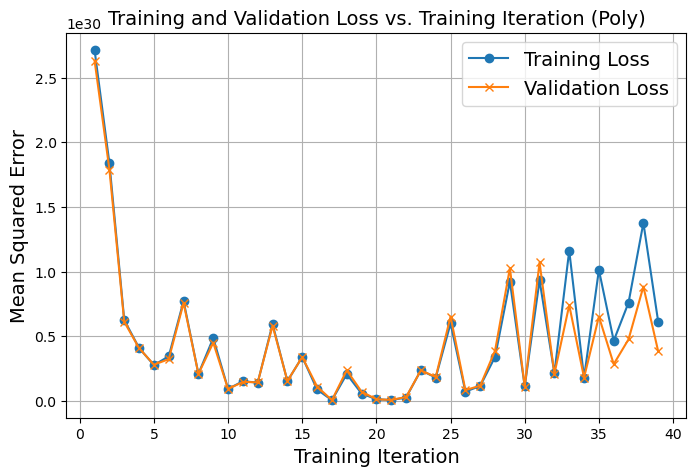

Final Mean Squared Error (SGD) (Poly): 8.299887368512644e+29
Early stopping at iteration 19 due to no improvement in validation loss.
Early stopping at iteration 13 due to no improvement in validation loss.
Early stopping at iteration 7 due to no improvement in validation loss.
Early stopping at iteration 19 due to no improvement in validation loss.


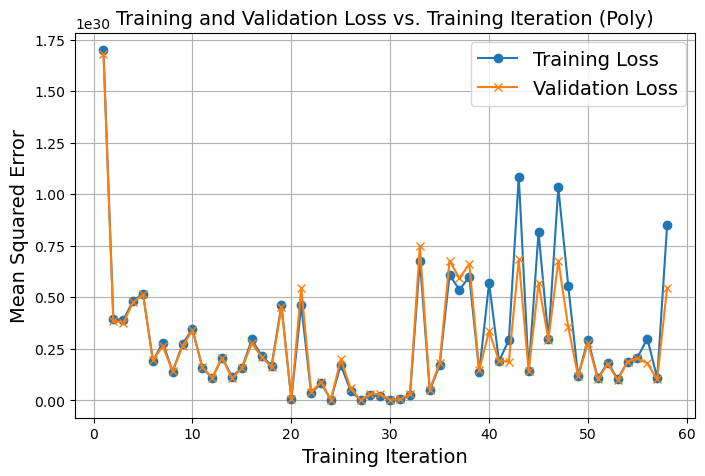

Final Mean Squared Error (SGD) (Poly): 1.1367460211060655e+30
Early stopping at iteration 18 due to no improvement in validation loss.
Early stopping at iteration 10 due to no improvement in validation loss.
Early stopping at iteration 13 due to no improvement in validation loss.
Early stopping at iteration 21 due to no improvement in validation loss.


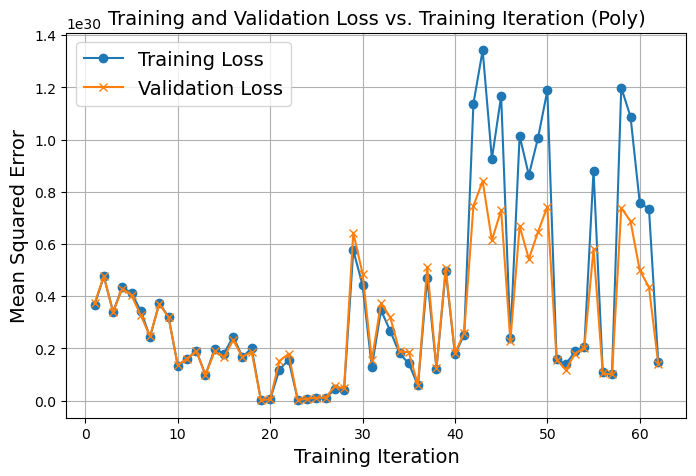

Final Mean Squared Error (SGD) (Poly): 1.5417238272802845e+29


In [74]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold

warnings.filterwarnings("ignore")

# Define the number of folds (k)
k = 4

# Create the SGDRegressor model with appropriate hyperparameters
alphaList_poly = [ 0.01, 0.1,0]
for alpha_poly in alphaList_poly:
    sgd_model_poly = SGDRegressor(loss='squared_error', alpha=alpha_poly, max_iter=100, random_state=42)

    # Initialize lists to store training and validation loss
    training_loss_poly = []
    validation_loss_poly = []

    # Initialize KFold cross-validator
    kf_poly = KFold(n_splits=k, shuffle=True, random_state=42)

    for train_index_poly, val_index_poly in kf_poly.split(X_train_poly):
        X_train_fold_poly, X_val_fold_poly = X_train_poly[train_index_poly], X_train_poly[val_index_poly]
        y_train_fold_poly, y_val_fold_poly = y_train[train_index_poly], y_train[val_index_poly]

        # Number of training iterations
        n_iterations_poly = 100

        # Early stopping parameters
        early_stopping_rounds_poly = 5  # Number of iterations with no improvement to wait before stopping
        best_val_loss_poly = float('inf')  # Initialize the best validation loss to positive infinity
        no_improvement_count_poly = 0  # Initialize the count of iterations with no improvement

        for iteration_poly in range(n_iterations_poly):
            # Fit the model for one iteration (one pass through the training data)
            sgd_model_poly.partial_fit(X_train_fold_poly, y_train_fold_poly)

            # Predict on the training data
            y_train_pred_poly = sgd_model_poly.predict(X_train_fold_poly)

            # Calculate training loss (Mean Squared Error) and append to the list
            train_loss_poly = mean_squared_error(y_train_fold_poly, y_train_pred_poly)
            training_loss_poly.append(train_loss_poly)

            # Predict on the validation data
            y_val_pred_poly = sgd_model_poly.predict(X_val_fold_poly)

            # Calculate validation loss (Mean Squared Error) and append to the list
            val_loss_poly = mean_squared_error(y_val_fold_poly, y_val_pred_poly)
            validation_loss_poly.append(val_loss_poly)

            # Check for early stopping
            if val_loss_poly < best_val_loss_poly:
                best_val_loss_poly = val_loss_poly
                no_improvement_count_poly = 0
            else:
                no_improvement_count_poly += 1

            if no_improvement_count_poly >= early_stopping_rounds_poly:
                print(f"Early stopping at iteration {iteration_poly + 1} due to no improvement in validation loss.")
                break

    # Plot training and validation loss as a function of training iteration
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, len(training_loss_poly) + 1), training_loss_poly, label='Training Loss', marker='o')
    plt.plot(range(1, len(validation_loss_poly) + 1), validation_loss_poly, label='Validation Loss', marker='x')
    plt.xlabel('Training Iteration')
    plt.ylabel('Mean Squared Error')
    plt.title('Training and Validation Loss vs. Training Iteration (Poly)')
    plt.legend()
    plt.grid()
    plt.show()

    # Final model evaluation
    y_pred_sgd_poly = sgd_model_poly.predict(X_test_poly)
    final_mse_poly = mean_squared_error(y_test, y_pred_sgd_poly)
    print("Final Mean Squared Error (SGD) (Poly):", final_mse_poly)

warnings.resetwarnings()


The above graph indicates that the model is overfitting the data. Additionally, comparing the MSE between linear and polynomial regression, we can observe that linear regression performs better. Further, the graphical representation of training and validation loss for the linear model indicated that the model is a better fit as compared the training and validation loss for polynomial regression. One of the reasons for this could be that the updates in SGD are noisy and have a high variance, which can make the optimization process less stable.

Ref: https://www.geeksforgeeks.org/ml-stochastic-gradient-descent-sgd/

Alpha = 0.001
Lasso Regression Train MSE: 189.98092079375363
Ridge Regression Train MSE: 189.6656876338909
===
Alpha = 0.01
Lasso Regression Train MSE: 191.76893835778452
Ridge Regression Train MSE: 189.66569524334707
===
Alpha = 0.1
Lasso Regression Train MSE: 199.41273474379224
Ridge Regression Train MSE: 189.66638471378084
===
Alpha = 1.0
Lasso Regression Train MSE: 210.27029011135812
Ridge Regression Train MSE: 189.70105232503423
===


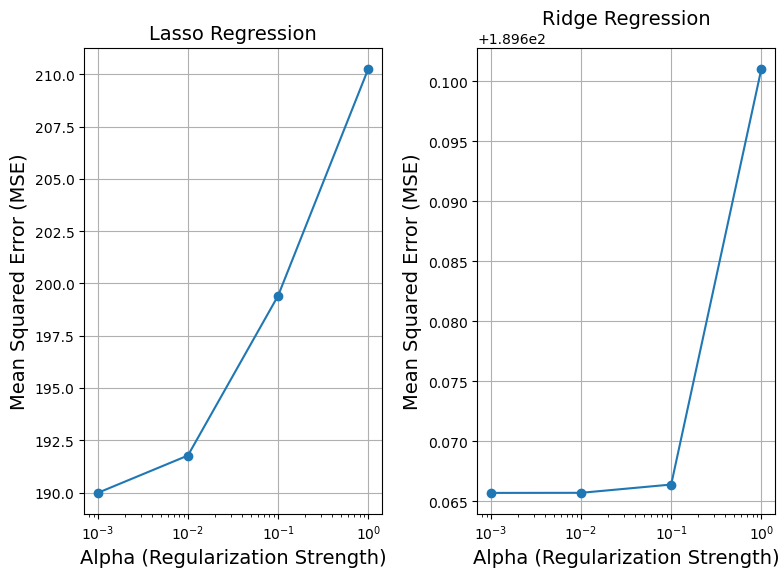

In [75]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

# Define a list of alpha values to try
alphas = [0.001, 0.01, 0.1, 1.0]

# Initialize empty lists to store the MSE values
lasso_mse_values_poly = []
ridge_mse_values_poly = []

for alpha in alphas:
    lasso_reg_poly = Lasso(alpha=alpha)
    ridge_reg_poly = Ridge(alpha=alpha)

    # Fit the Lasso model
    lasso_reg_poly.fit(X_train_poly, y_train)

    # Make predictions with the trained Lasso model
    lasso_predictions_poly = lasso_reg_poly.predict(X_train_poly)

    # Calculate MSE for Lasso
    lasso_mse_poly = mean_squared_error(y_train, lasso_predictions_poly)
    lasso_mse_values_poly.append(lasso_mse_poly)

    # Fit the Ridge model
    ridge_reg_poly.fit(X_train_poly, y_train)

    # Make predictions with the trained Ridge model
    ridge_predictions_poly = ridge_reg_poly.predict(X_train_poly)

    # Calculate MSE for Ridge
    ridge_mse_poly = mean_squared_error(y_train, ridge_predictions_poly)
    ridge_mse_values_poly.append(ridge_mse_poly)

    # Print the MSE values for each alpha
    print(f"Alpha = {alpha}")
    print("Lasso Regression Train MSE:", lasso_mse_poly)
    print("Ridge Regression Train MSE:", ridge_mse_poly)
    print("===")

# Create individual plots for each regularization technique
plt.figure(figsize=(12, 6))

# Lasso Regression Plot
plt.subplot(131)
plt.semilogx(alphas, lasso_mse_values_poly, marker='o')
plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Lasso Regression')
plt.grid(True)

# Ridge Regression Plot
plt.subplot(132)
plt.semilogx(alphas, ridge_mse_values_poly, marker='o')
plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Ridge Regression')
plt.grid(True)

plt.tight_layout()
plt.show()

warnings.resetwarnings()


Alpha: 0.001, L1 Ratio: 0.1, Final Mean Squared Error (Elastic Net): 182.04112214651147
Alpha: 0.01, L1 Ratio: 0.1, Final Mean Squared Error (Elastic Net): 183.58863195096433
Alpha: 0.1, L1 Ratio: 0.1, Final Mean Squared Error (Elastic Net): 187.82109735918561
Alpha: 1, L1 Ratio: 0.1, Final Mean Squared Error (Elastic Net): 195.47507790542667
Alpha: 0.001, L1 Ratio: 0.2, Final Mean Squared Error (Elastic Net): 182.01796444057337
Alpha: 0.01, L1 Ratio: 0.2, Final Mean Squared Error (Elastic Net): 183.4826470309031
Alpha: 0.1, L1 Ratio: 0.2, Final Mean Squared Error (Elastic Net): 187.96700797613832
Alpha: 1, L1 Ratio: 0.2, Final Mean Squared Error (Elastic Net): 196.10184325537935
Alpha: 0.001, L1 Ratio: 0.4, Final Mean Squared Error (Elastic Net): 181.96676559809575
Alpha: 0.01, L1 Ratio: 0.4, Final Mean Squared Error (Elastic Net): 183.26432157045372
Alpha: 0.1, L1 Ratio: 0.4, Final Mean Squared Error (Elastic Net): 188.13272771029722
Alpha: 1, L1 Ratio: 0.4, Final Mean Squared Error 

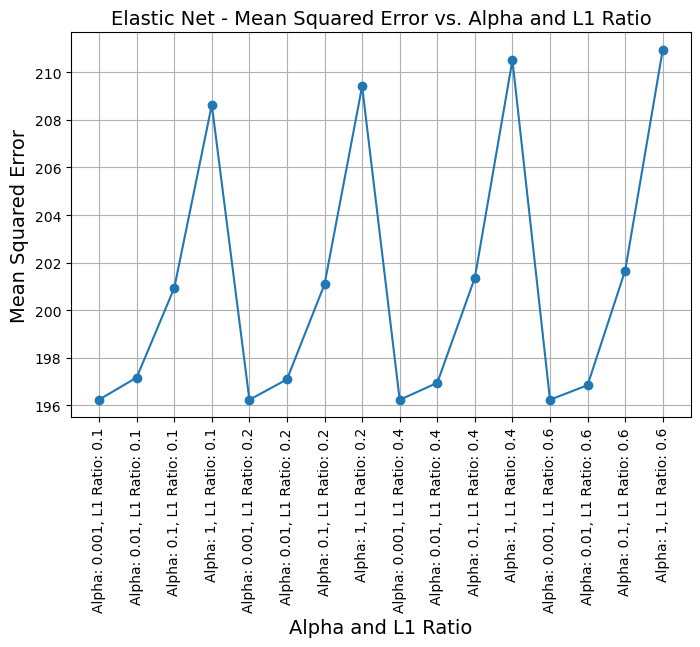

In [76]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold

warnings.filterwarnings("ignore")

# Define the number of folds (k)
k = 4

# Create lists of alpha (regularization strength) and l1_ratio (L1 mixing parameter)
alpha_list = [0.001, 0.01, 0.1, 1]
l1_ratio_list = [0.1, 0.2, 0.4, 0.6]  # Different L1 ratios for Elastic Net

alpha_l1_list = []  # Store alpha and l1_ratio combinations
elastic_mse_vals = []  # Store Elastic Net MSE values

for l1_ratio in l1_ratio_list:
    for alpha in alpha_list:
        elastic_net_model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, max_iter=200, random_state=42)

        # Initialize KFold cross-validator
        kf = KFold(n_splits=k, shuffle=True, random_state=42)
        
        fold_training_losses = []  # Store training losses for each fold
        fold_validation_losses = []  # Store validation losses for each fold

        for train_index, test_index in kf.split(X_train_poly):  # Use the polynomial features X_train_poly
            X_train_fold, X_val_fold = X_train_poly[train_index], X_train_poly[test_index]
            y_train_fold, y_val_fold = y_train[train_index], y_train[test_index]

            # Fit the Elastic Net model
            elastic_net_model.fit(X_train_fold, y_train_fold)

            # Predict on the training data
            y_train_pred = elastic_net_model.predict(X_train_fold)

            # Calculate training loss (Mean Squared Error) and append to the list
            train_loss = mean_squared_error(y_train_fold, y_train_pred)
            fold_training_losses.append(train_loss)

            # Predict on the validation data
            y_val_pred = elastic_net_model.predict(X_val_fold)

            # Calculate validation loss (Mean Squared Error) and append to the list
            val_loss = mean_squared_error(y_val_fold, y_val_pred)
            fold_validation_losses.append(val_loss)
        
        # Calculate the mean training and validation loss across folds for this alpha
        mean_training_loss = np.mean(fold_training_losses)
        mean_validation_loss = np.mean(fold_validation_losses)
        
        alpha_l1_list.append((alpha, l1_ratio))
        elastic_mse_vals.append(mean_validation_loss)

        # Final model evaluation
        elastic_net_model.fit(X_train_poly, y_train)  # Fit on the entire polynomial feature set
        y_pred_elastic_net = elastic_net_model.predict(X_test_poly)  # Use polynomial features X_test_poly
        final_mse = mean_squared_error(y_test, y_pred_elastic_net)
        print(f"Alpha: {alpha}, L1 Ratio: {l1_ratio}, Final Mean Squared Error (Elastic Net): {final_mse}")

# Plot training and validation loss as a function of alpha
plt.figure(figsize=(8, 5))
plt.plot(range(len(alpha_l1_list)), elastic_mse_vals, marker='o')
plt.xticks(range(len(alpha_l1_list)), [f"Alpha: {alpha}, L1 Ratio: {l1_ratio}" for alpha, l1_ratio in alpha_l1_list], rotation=90)
plt.xlabel('Alpha and L1 Ratio')
plt.ylabel('Mean Squared Error')
plt.title('Elastic Net - Mean Squared Error vs. Alpha and L1 Ratio')
plt.grid()
plt.show()

warnings.resetwarnings()


Analyzing the MSE values across Ridge, Lasso and Elastic-Net, the model performs best at the lowest alpha value. However, the ideal model is also dependent on multi-collinearity of the dataset. While Elastic-Net needs to ideally be used along with Lasso and Ridge, Lasso and elastic-net doesnot work well with multi-collinear features. Since, multi-collinearity does not exists in this case, Lasso and elastic-net can be used as the regularization technique.

Ref: https://www.geeksforgeeks.org/lasso-vs-ridge-vs-elastic-net-ml/

In [77]:
X_train_poly.shape

(15083, 230)

#### Trial one: Batch size - 20, learning rate - 0.01

Predictions for fold: 1
Intercept value: -0.22909053395679796 
Weight values: [[ 0.27587841]
 [ 0.98600359]
 [-0.46282628]
 [ 1.20389164]
 [ 0.26371619]
 [ 0.39367081]
 [ 0.33552568]
 [-0.54997448]
 [-1.77350975]
 [ 0.99772074]
 [ 0.07817275]
 [-0.87170693]
 [-0.65326657]
 [-3.16322769]
 [-0.58800814]
 [-0.28227726]
 [ 0.21899142]
 [-0.91141269]
 [-0.5385676 ]
 [ 0.87837922]
 [-0.2824135 ]
 [-1.5935594 ]
 [-0.89857353]
 [-0.79695992]
 [ 0.25865048]
 [-0.90809488]
 [-2.15242228]
 [-3.09334718]
 [ 0.10993886]
 [-1.36200838]
 [ 1.99564857]
 [-0.39359987]
 [-1.14921232]
 [-0.55028554]
 [-0.91894303]
 [ 0.89576955]
 [-1.29744339]
 [ 0.49558487]
 [-0.52793715]
 [-1.25397122]
 [-0.68382899]
 [-0.14506495]
 [-1.3286707 ]
 [ 0.08693019]
 [ 0.47205133]
 [-1.55586634]
 [ 0.23290245]
 [ 0.30775012]
 [-2.09428005]
 [-0.95122795]
 [-2.68805415]
 [-0.38111071]
 [-2.58663409]
 [-1.64194423]
 [-2.80183177]
 [-0.20265281]
 [-0.68523008]
 [-1.55423012]
 [-1.23885802]
 [ 0.94060306]
 [-1.20601077]
 [-0.60

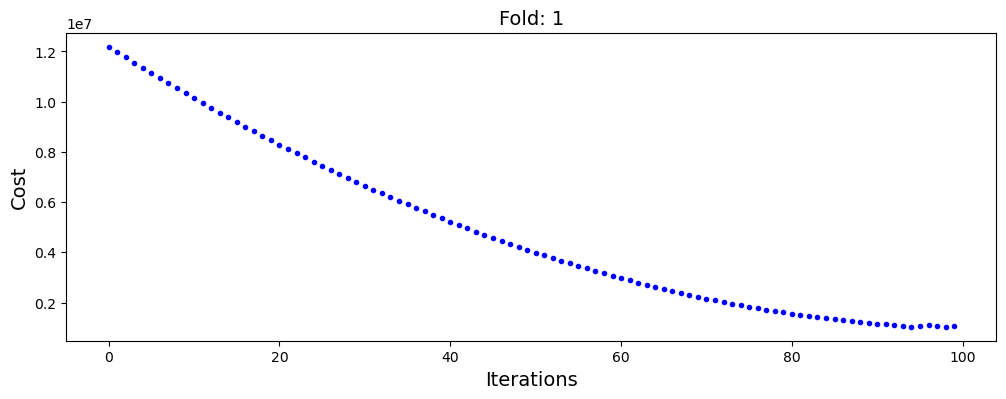

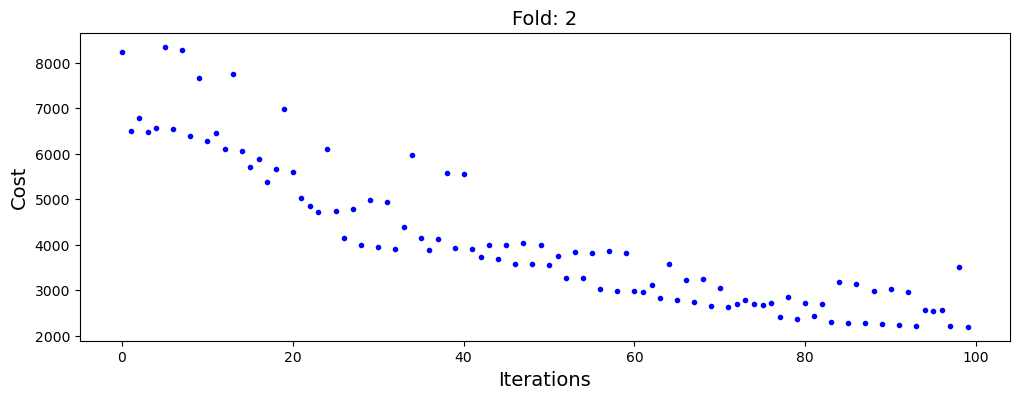

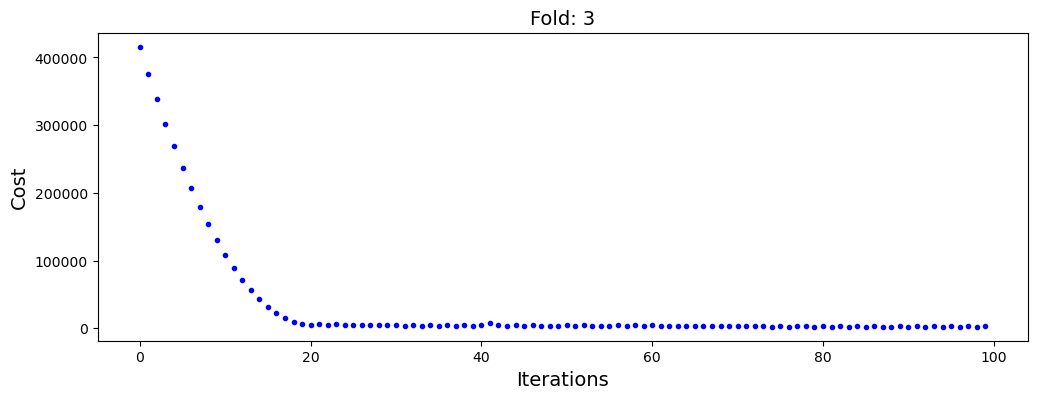

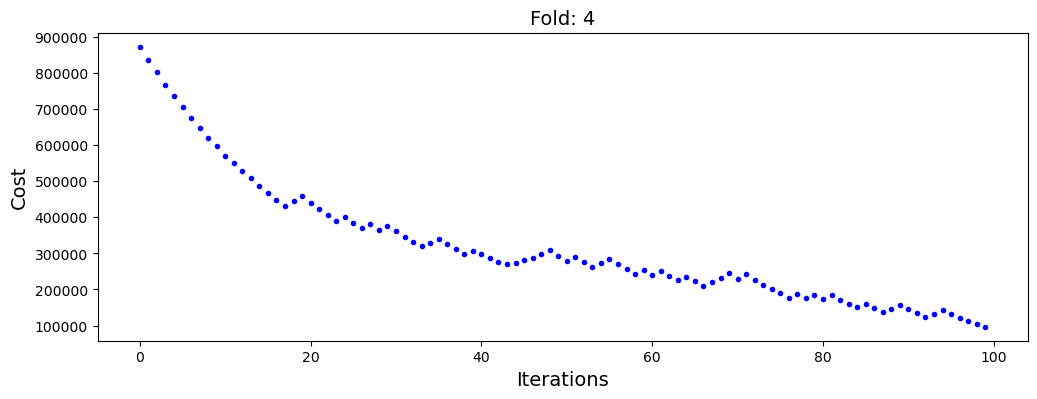

In [78]:
i = 1
gradient_clip_threshold = 1.0  # Adjust this threshold as needed

for train_index, test_index in kf.split(X_train_poly):
    X_train_fold_poly, X_test_fold_poly = X_train_poly[train_index], X_train_poly[test_index]
    y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]
    
    # Add bias column to fold data
    X_train_fold_poly = np.c_[np.ones((len(X_train_fold_poly), 1)), X_train_fold_poly]
    X_test_fold_poly = np.c_[np.ones((len(X_test_fold_poly), 1)), X_test_fold_poly]
    
    lr = 0.01
    n_iter = 100
    batch_size = 20
    theta_poly = np.random.randn(231, 1)  # Initialize coefficients (matching the number of features + bias)

    # Train the model using minibatch gradient descent with gradient clipping
    theta_poly, cost_history_poly = minibatch_gradient_descent(X_train_fold_poly, y_train_fold, theta_poly, lr, n_iter, batch_size, gradient_clip_threshold)

    print('Predictions for fold:', i)
    print('Intercept value:', theta_poly[0, 0], '\nWeight values:', theta_poly[1:])
    
    # Use the validation data and mean square error to evaluate performance
    N = len(y_test_fold)
    y_hat_poly = np.dot(X_test_fold_poly, theta_poly)
    mse_val_poly = (1 / N) * (np.sum(np.square(y_hat_poly - y_test_fold)))
    print('Mean Square Error:', round(mse_val_poly, 3), '\n')
    
    fig, ax = plt.subplots(figsize=(12, 4))
    plt.title('Fold: ' + str(i))
    ax.set_ylabel('Cost')
    ax.set_xlabel('Iterations')
    _ = ax.plot(range(n_iter), cost_history_poly, 'b.')
    
    i += 1


#### Trial one: Batch size - 42, learning rate - 0.01

Predictions for fold: 1
Intercept value: 1.7059262520917533 
Weight values: [[-5.95047416e-01]
 [ 3.90183665e-02]
 [ 9.26841627e-01]
 [ 1.04923305e+00]
 [-7.79937976e-02]
 [ 1.17511143e+00]
 [-7.33148426e-01]
 [ 7.90049951e-01]
 [-1.40290113e+00]
 [ 1.82287789e+00]
 [ 2.47220411e-01]
 [-1.46698272e-01]
 [-2.49780280e-01]
 [-4.45108707e-01]
 [ 4.39733394e-01]
 [ 4.06816245e-01]
 [ 1.48472136e+00]
 [ 1.29958363e+00]
 [-2.32731924e+00]
 [-9.86614610e-02]
 [ 7.42966245e-01]
 [ 2.21208676e+00]
 [-2.73794995e-01]
 [-1.89800978e-01]
 [-8.56594648e-01]
 [ 2.72640503e-01]
 [-4.72318084e-01]
 [-4.64178122e-02]
 [ 3.33171013e-01]
 [ 4.37946492e-01]
 [-1.04848513e+00]
 [ 1.95262965e+00]
 [ 2.38020549e-01]
 [ 1.71191159e+00]
 [ 2.08184467e-01]
 [ 2.11364769e+00]
 [-6.65954411e-01]
 [-1.45833471e+00]
 [ 8.54817453e-01]
 [ 2.32296715e-01]
 [ 7.64022389e-01]
 [ 3.97088352e-01]
 [ 6.12962952e-01]
 [ 4.75295235e-01]
 [ 5.25927954e-01]
 [-1.94213528e-02]
 [-7.17340940e-01]
 [ 2.26320785e+00]
 [ 1.3476133

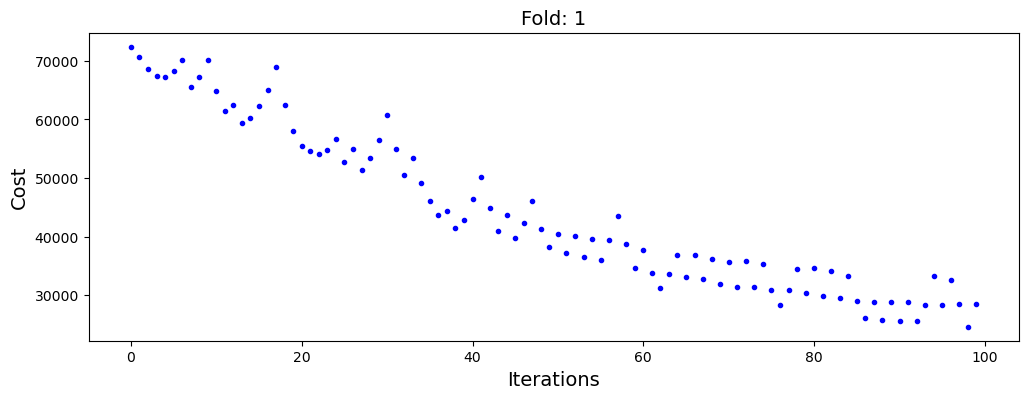

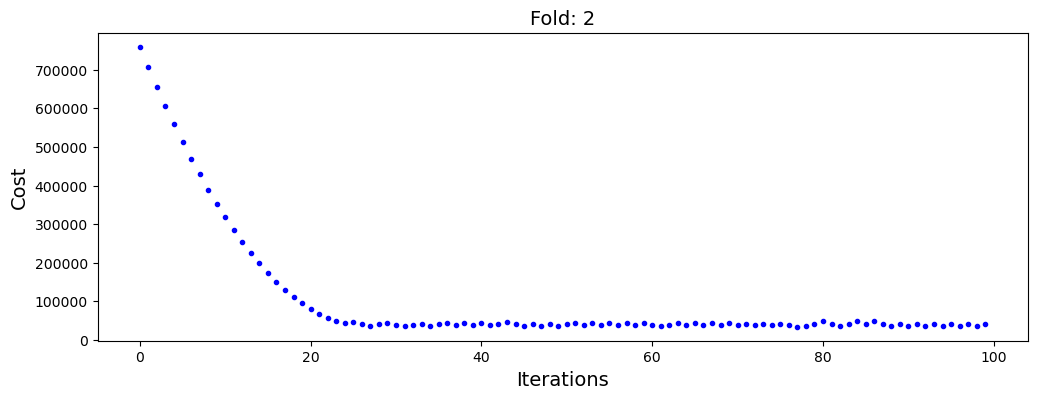

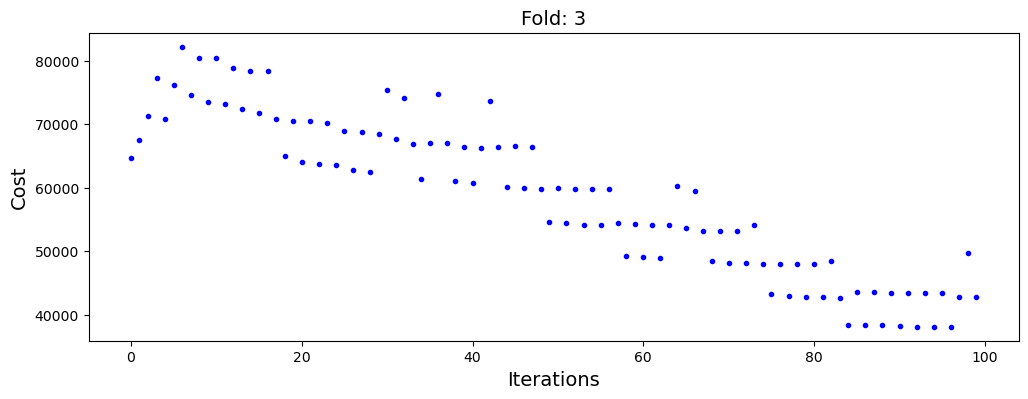

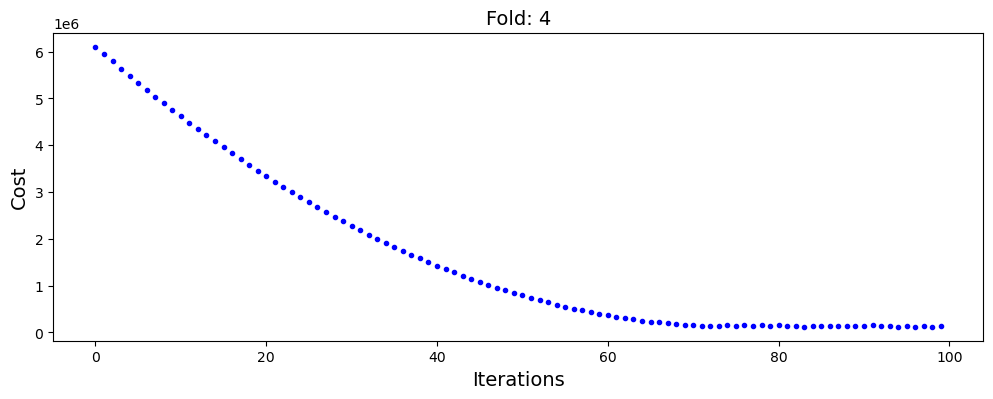

In [79]:
i = 1
gradient_clip_threshold = 1.0  # Adjust this threshold as needed

for train_index, test_index in kf.split(X_train_poly):
    X_train_fold_poly, X_test_fold_poly = X_train_poly[train_index], X_train_poly[test_index]
    y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]
    
    # Add bias column to fold data
    X_train_fold_poly = np.c_[np.ones((len(X_train_fold_poly), 1)), X_train_fold_poly]
    X_test_fold_poly = np.c_[np.ones((len(X_test_fold_poly), 1)), X_test_fold_poly]
    
    lr = 0.01
    n_iter = 100
    batch_size = 42
    theta_poly = np.random.randn(231, 1)  # Initialize coefficients (matching the number of features + bias)

    # Train the model using minibatch gradient descent with gradient clipping
    theta_poly, cost_history_poly = minibatch_gradient_descent(X_train_fold_poly, y_train_fold, theta_poly, lr, n_iter, batch_size, gradient_clip_threshold)

    print('Predictions for fold:', i)
    print('Intercept value:', theta_poly[0, 0], '\nWeight values:', theta_poly[1:])
    
    # Use the validation data and mean square error to evaluate performance
    N = len(y_test_fold)
    y_hat_poly = np.dot(X_test_fold_poly, theta_poly)
    mse_val_poly = (1 / N) * (np.sum(np.square(y_hat_poly - y_test_fold)))
    print('Mean Square Error:', round(mse_val_poly, 3), '\n')
    
    fig, ax = plt.subplots(figsize=(12, 4))
    plt.title('Fold: ' + str(i))
    ax.set_ylabel('Cost')
    ax.set_xlabel('Iterations')
    _ = ax.plot(range(n_iter), cost_history_poly, 'b.')
    
    i += 1


#### Trial one: Batch size - 68, learning rate - 0.01

Predictions for fold: 1
Intercept value: 0.39611187695705263 
Weight values: [[-0.95838268]
 [ 0.9313907 ]
 [ 0.34713063]
 [ 1.29041725]
 [ 0.70152562]
 [ 0.67793376]
 [ 0.11695157]
 [ 0.25227536]
 [ 1.08905871]
 [ 1.11038872]
 [ 0.47227226]
 [ 0.82908777]
 [-0.98207275]
 [-0.77754674]
 [ 1.36420818]
 [-0.15033595]
 [ 0.48861073]
 [ 0.67030883]
 [ 0.74451223]
 [ 1.68179952]
 [ 1.42032524]
 [-0.42775485]
 [-1.04928996]
 [ 1.35329975]
 [-0.36996784]
 [ 2.0326408 ]
 [ 1.38293523]
 [ 0.69617427]
 [ 0.507377  ]
 [ 0.56220369]
 [ 0.06571664]
 [ 1.36528749]
 [-0.59022152]
 [ 1.4778068 ]
 [-0.85862408]
 [ 1.51165122]
 [ 0.75989187]
 [-2.55554739]
 [-0.00841138]
 [ 0.8329222 ]
 [ 2.00988959]
 [-0.36037338]
 [-0.57328933]
 [-0.5511655 ]
 [ 0.32022375]
 [ 1.47345431]
 [ 0.21666764]
 [ 0.95389186]
 [-0.85669793]
 [-0.10412629]
 [ 1.8462778 ]
 [-0.24661133]
 [ 0.52200382]
 [-1.29311795]
 [ 0.6276826 ]
 [ 0.43277822]
 [ 0.86461535]
 [ 0.8711814 ]
 [-0.73424615]
 [-0.24734663]
 [ 0.49369518]
 [ 0.747

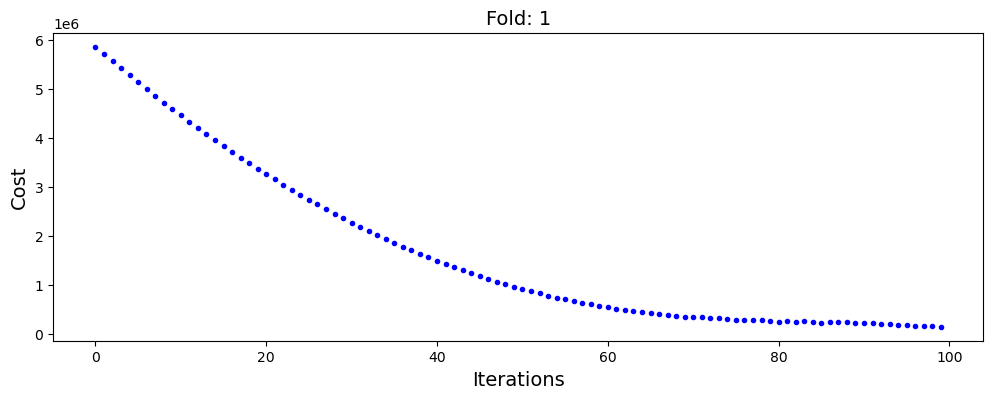

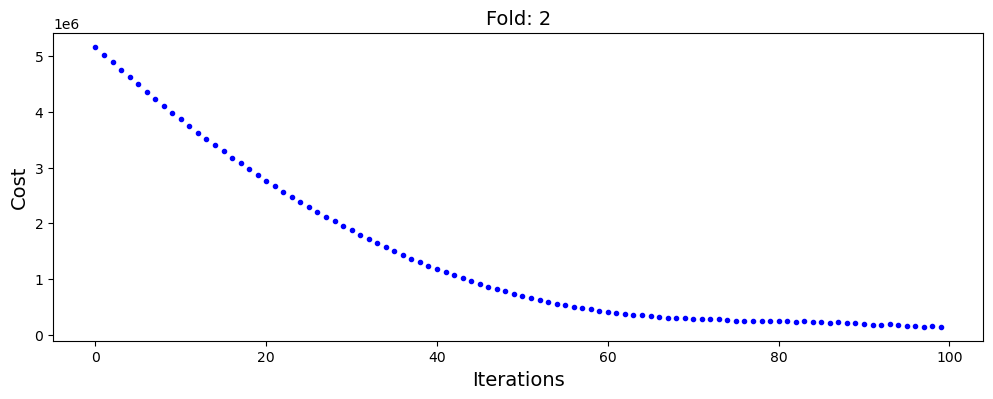

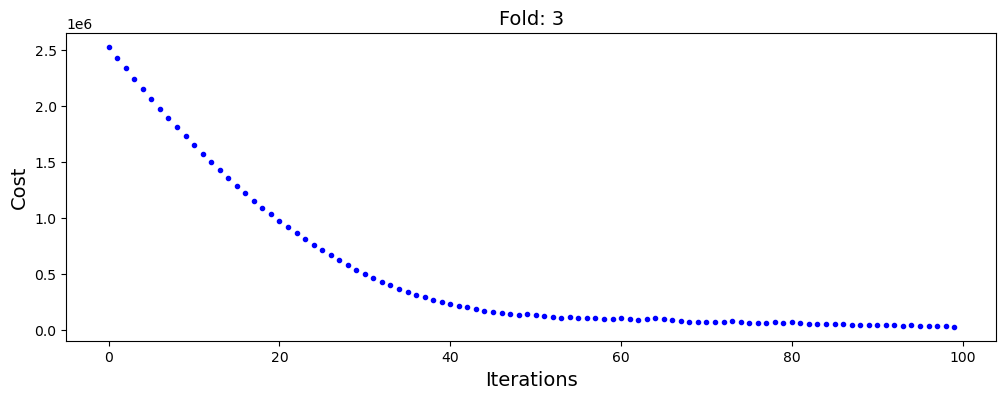

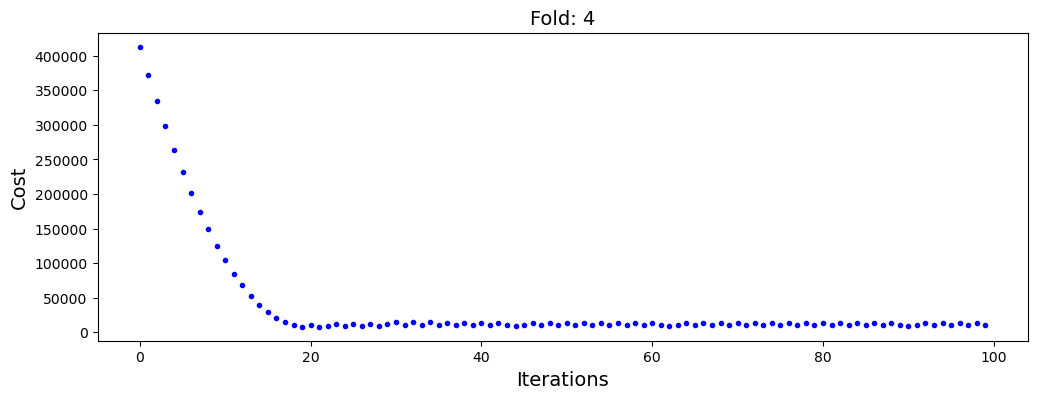

In [80]:
i = 1
gradient_clip_threshold = 1.0  # Adjust this threshold as needed

for train_index, test_index in kf.split(X_train_poly):
    X_train_fold_poly, X_test_fold_poly = X_train_poly[train_index], X_train_poly[test_index]
    y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]
    
    # Add bias column to fold data
    X_train_fold_poly = np.c_[np.ones((len(X_train_fold_poly), 1)), X_train_fold_poly]
    X_test_fold_poly = np.c_[np.ones((len(X_test_fold_poly), 1)), X_test_fold_poly]
    
    lr = 0.01
    n_iter = 100
    batch_size = 68
    theta_poly = np.random.randn(231, 1)  # Initialize coefficients (matching the number of features + bias)

    # Train the model using minibatch gradient descent with gradient clipping
    theta_poly, cost_history_poly = minibatch_gradient_descent(X_train_fold_poly, y_train_fold, theta_poly, lr, n_iter, batch_size, gradient_clip_threshold)

    print('Predictions for fold:', i)
    print('Intercept value:', theta_poly[0, 0], '\nWeight values:', theta_poly[1:])
    
    # Use the validation data and mean square error to evaluate performance
    N = len(y_test_fold)
    y_hat_poly = np.dot(X_test_fold_poly, theta_poly)
    mse_val_poly = (1 / N) * (np.sum(np.square(y_hat_poly - y_test_fold)))
    print('Mean Square Error:', round(mse_val_poly, 3), '\n')
    
    fig, ax = plt.subplots(figsize=(12, 4))
    plt.title('Fold: ' + str(i))
    ax.set_ylabel('Cost')
    ax.set_xlabel('Iterations')
    _ = ax.plot(range(n_iter), cost_history_poly, 'b.')
    
    i += 1


While the data converges for all the batches, the mse values for these models is significantly higher as compared to the linear regression models.

### Question G: Make predictions of the labels on the test data, using the trained model with chosen hyperparameters. Summarize performance using the appropriate evaluation metric. Discuss the results. Include thoughts about what further can be explored to increase performance. 

In [81]:
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor
from sklearn.metrics import mean_squared_error

warnings.filterwarnings("ignore")

# Create a DataFrame to store MSE values
mse_table = pd.DataFrame(columns=['Model', 'MSE'])

# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
linear_reg_predictions = linear_reg.predict(X_test)
linear_reg_mse = mean_squared_error(y_test, linear_reg_predictions)
mse_table = mse_table.append({'Model': 'Linear Regression', 'MSE': linear_reg_mse}, ignore_index=True)

# Ridge Regression
ridge_reg = Ridge(alpha=0.001)
ridge_reg.fit(X_train, y_train)
ridge_reg_predictions = ridge_reg.predict(X_test)
ridge_reg_mse = mean_squared_error(y_test, ridge_reg_predictions)
mse_table = mse_table.append({'Model': 'Ridge Regression', 'MSE': ridge_reg_mse}, ignore_index=True)

# Lasso Regression
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)
lasso_reg_predictions = lasso_reg.predict(X_test)
lasso_reg_mse = mean_squared_error(y_test, lasso_reg_predictions)
mse_table = mse_table.append({'Model': 'Lasso Regression', 'MSE': lasso_reg_mse}, ignore_index=True)

# Elastic Net Regression
elastic_net = ElasticNet(alpha=0.001, l1_ratio=0.1)  
elastic_net.fit(X_train, y_train)
elastic_net_predictions = elastic_net.predict(X_test)
elastic_net_mse = mean_squared_error(y_test, elastic_net_predictions)
mse_table = mse_table.append({'Model': 'Elastic Net', 'MSE': elastic_net_mse}, ignore_index=True)

# SGDRegressor (Stochastic Gradient Descent)
sgd_reg = SGDRegressor(alpha=0.001, max_iter=1000, random_state=42)
sgd_reg.fit(X_train, y_train)
sgd_reg_predictions = sgd_reg.predict(X_test)
sgd_reg_mse = mean_squared_error(y_test, sgd_reg_predictions)
mse_table = mse_table.append({'Model': 'SGD Regression', 'MSE': sgd_reg_mse}, ignore_index=True)

# Display the MSE values
print(mse_table)

warnings.resetwarnings()

               Model           MSE
0  Linear Regression  2.435591e+02
1   Ridge Regression  2.435591e+02
2   Lasso Regression  2.435578e+02
3        Elastic Net  2.435872e+02
4     SGD Regression  9.138920e+11


In [82]:
warnings.filterwarnings("ignore")

# Create a DataFrame to store MSE values
mse_table_poly = pd.DataFrame(columns=['Model', 'MSE_poly'])

# Linear Regression
linear_reg_poly = LinearRegression()
linear_reg_poly.fit(X_train_poly, y_train)
linear_reg_predictions_poly = linear_reg_poly.predict(X_test_poly)
linear_reg_mse_poly = mean_squared_error(y_test, linear_reg_predictions_poly)
mse_table_poly = mse_table_poly.append({'Model': 'Linear Regression', 'MSE_poly': linear_reg_mse_poly}, ignore_index=True)

# Ridge Regression
ridge_reg_poly = Ridge(alpha=0.001)
ridge_reg_poly.fit(X_train_poly, y_train)
ridge_reg_predictions_poly = ridge_reg_poly.predict(X_test_poly)
ridge_reg_mse_poly = mean_squared_error(y_test, ridge_reg_predictions_poly)
mse_table_poly = mse_table_poly.append({'Model': 'Ridge Regression', 'MSE_poly': ridge_reg_mse_poly}, ignore_index=True)

# Lasso Regression
lasso_reg_poly = Lasso(alpha=0.001)
lasso_reg_poly.fit(X_train_poly, y_train)
lasso_reg_predictions_poly = lasso_reg_poly.predict(X_test_poly)
lasso_reg_mse_poly = mean_squared_error(y_test, lasso_reg_predictions_poly)
mse_table_poly = mse_table_poly.append({'Model': 'Lasso Regression', 'MSE_poly': lasso_reg_mse_poly}, ignore_index=True)

# Elastic Net Regression
elastic_net_poly = ElasticNet(alpha=0.001, l1_ratio=0.1)  # Adjust l1_ratio as needed
elastic_net_poly.fit(X_train_poly, y_train)
elastic_net_predictions_poly = elastic_net_poly.predict(X_test_poly)
elastic_net_mse_poly = mean_squared_error(y_test, elastic_net_predictions_poly)
mse_table_poly = mse_table_poly.append({'Model': 'Elastic Net', 'MSE_poly': elastic_net_mse_poly}, ignore_index=True)

# SGDRegressor (Stochastic Gradient Descent)
sgd_reg_poly = SGDRegressor(alpha=0.001, max_iter=1000, random_state=42)
sgd_reg_poly.fit(X_train_poly, y_train)
sgd_reg_predictions_poly = sgd_reg_poly.predict(X_test_poly)
sgd_reg_mse_poly = mean_squared_error(y_test, sgd_reg_predictions_poly)
mse_table_poly = mse_table_poly.append({'Model': 'SGD Regression', 'MSE_poly': sgd_reg_mse_poly}, ignore_index=True)

# Display the MSE values
print(mse_table_poly)

warnings.resetwarnings()

               Model      MSE_poly
0  Linear Regression  1.816824e+02
1   Ridge Regression  1.816743e+02
2   Lasso Regression  1.812181e+02
3        Elastic Net  1.817695e+02
4     SGD Regression  3.165407e+29


Summarizing results:

Analyzing the evaluation metric across linear and polynomial regression models, we notice that the MSE is better for polynomial regression as compared to linear regression. This could be because the data contains non-linear. Further, given that polynomial regression works better when there are multiple features. It is capable of finding relationships between features, which is something a plain linear regression model cannot do. Thus, indicating that polynomial regression is a better fit for this dataset.

Additionally, we can observe that Lasso performs better in both linear and polynomial regression models. This could indicate that the dataset is noisy. This fact needs to be taken into consideration while predicting future car prices.

Future work:
- Analyze which features could be dropped in order to improve performance
- Hypermetre tuning methods such as grid search can be used to improve the performance of the model.
- Test the models with other regression models such as Random Forest and other bagging or boosting techniques.

Ref: Hands-on Machine Learning with Scikit-Learn, Keras and TensorFlow (3rd edition).

Additional resources used:
- Kaggle notebook: https://www.kaggle.com/code/gadigevishalsai/car-price-prediction-challenge-eda-regression/notebook#Car-Price-Prediction
- Data Source: https://www.kaggle.com/datasets/deepcontractor/car-price-prediction-challenge/data